**Exercise 11.11**.  Simulate 100 pairs of $(X_t, Y_t)$ from the model of Equation (11.3.1) on page 261 with $d = 3$, $β_0 = 0$, and $β_1 = 1$.  Use $\sigma_X = 2$ and $\sigma_e = 1$.  Display and interpret the sample CCF between these two series.

**Solution**.  The model of Equation (11.3.1) is

$$ Y_t = \beta_0 + \beta_1 X_{t - d} + e_t $$

where $\{X_t\}$ are independent, identically distributed random variables with variance $\sigma_X$ and the errors $\{ e_t \}$ are also white noise with variance $\sigma_e^2$ and are independent of the $X$'s.

In [1]:
set.seed(0)

n = 100
sigma_e = 1
sigma_X = 2
beta_0 = 0
beta_1 = 1
d = 3

X_t = rnorm(n+d, sd=sigma_X)
e_t = rnorm(n, sd=sigma_e)

Y_t = beta_0 + beta_1 * X_t[-(1:d)] + e_t

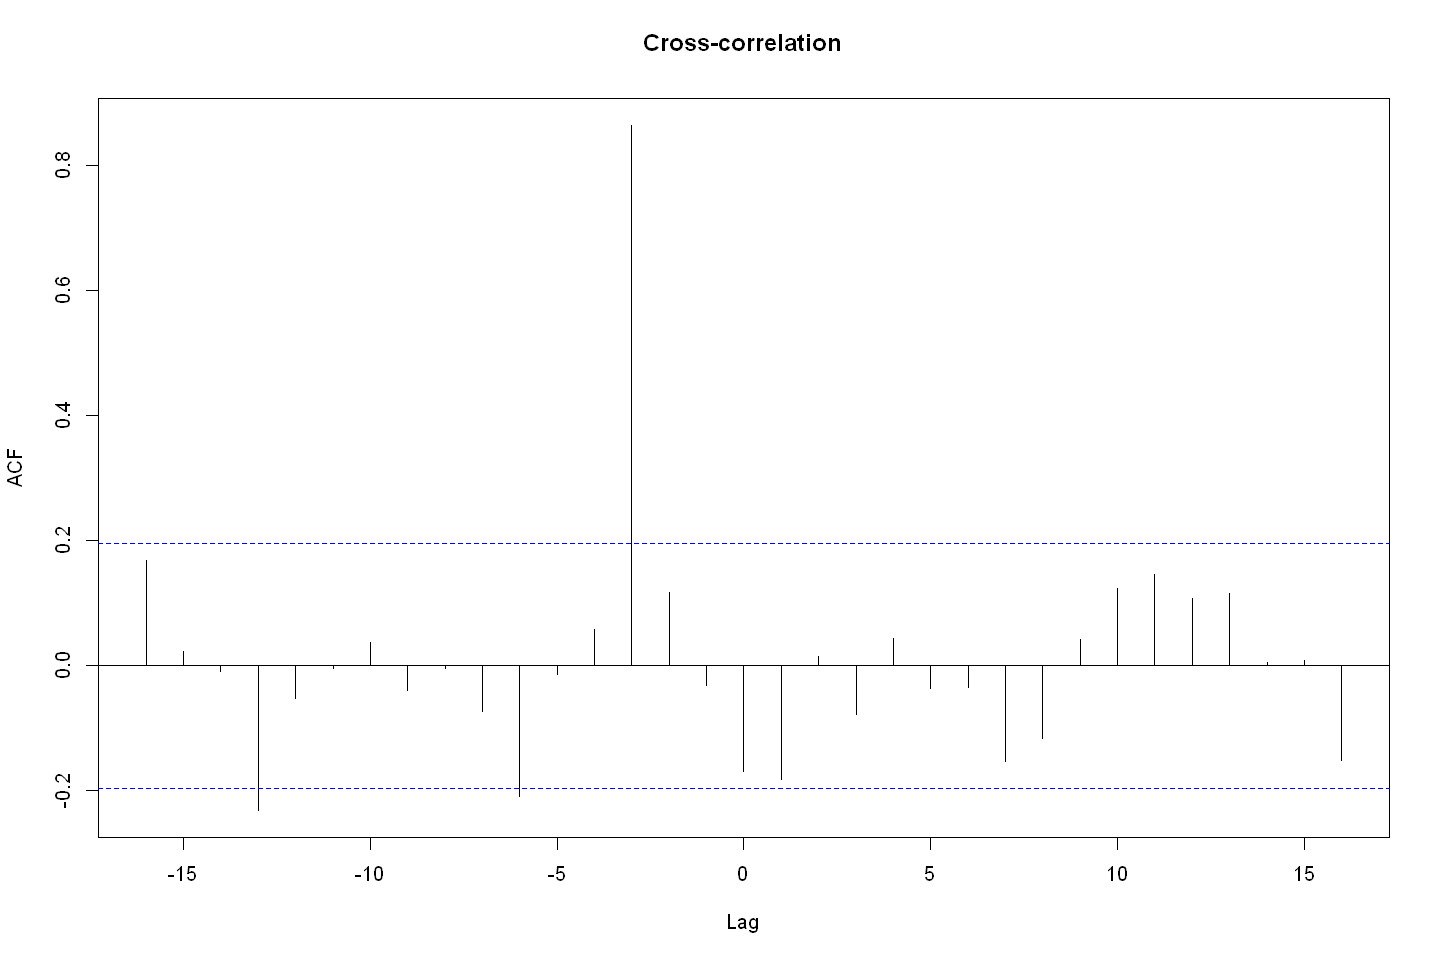

In [2]:
options(repr.plot.width=12, repr.plot.height=8)

ccf(Y_t, X_t[(1:n)], main='Cross-correlation')

The most statistically significant cross-correlation occurs at lag -3.  This coincides with the theoretical analysis -- all cross-correlations should be zero, other than $\rho_{-3}(X, Y) = 2 / \sqrt{4 + 1} \approx 0.894$.

**Exercise 11.12**.  Show that when the $X$ and $Y $are independent AR(1) time series with parameters $\phi_X$ and $\phi_Y$, respectively, Equation (11.3.5) on page 262 reduces to give Equation (11.3.6).

**Solution**.  Equation (11.3.5) states that, for stationary and independent processes $X$ and $Y$, the variance of $\sqrt{n} r_k(X, Y)$ is approximately

$$ 1 + 2\sum_{k=1}^\infty \rho_k(X) \rho_k(Y) \tag{11.3.5} $$

If $X$ and $Y$ are AR(1) processes, then $\rho_k(X) = \phi_X^k$ and $\rho_k(Y) = \phi_Y^k$, so the equation above reduces to an infinite geometric sum

$$ 1 + 2 \sum_{k=1}^\infty (\phi_X \phi_Y)^k = 1 + \frac{2 \phi_X \phi_Y}{1 - \phi_X \phi_Y} = \frac{1 + \phi_X \phi_Y}{1 - \phi_X \phi_Y} $$

therefore, the variance of $r_k(X, Y)$ is approximately

$$ \frac{1 + \phi_X \phi_Y}{n (1 - \phi_X \phi_Y)} \tag{13.5.6} $$

which is our result.

**Exercise 11.13**.  Show that for the process defined by Equation (11.4.5) on page 266, the cross-correlation between $\tilde{X}$ and $\tilde{Y}$ at lag $k$ is given by $\beta_{-k}(\sigma_\tilde{X} / \sigma_\tilde{Y})$.

**Solution**.  Equation (11.4.5) defines

$$ \tilde{Y}_t = \sum_k \beta_k \tilde{X}_{t - k} + \tilde{Z}_t \tag{11.4.5} $$

Therefore, the covariance at lag $\ell$ is

$$ 
\begin{align}
\text{Cov}[\tilde{X}_t, \tilde{Y}_{t - \ell}] &= \text{Cov}\left[\tilde{X}_t, \sum_k \beta_k \tilde{X}_{t - k} + \tilde{Z}_t\right]\\
&= \beta_{-\ell} \text{Cov}[\tilde{X}_t, \tilde{X}_t] \\
&= \beta_{-\ell} \sigma_\tilde{X}^2
\end{align}
$$

and so the correlation at lag $k$ is

$$ 
\text{Corr}[\tilde{X}_t, \tilde{Y}_{t - k}] 
= \frac{\text{Cov}[\tilde{X}_t, \tilde{Y}_{t - k}]}{\sqrt{\text{Var}[\tilde{X}_t] \text{Var}[\tilde{Y}_{t - k}]}}
= \beta_{-k} \frac{\sigma_\tilde{X}^2}{\sigma_\tilde{X} \sigma_\tilde{Y}}
= \beta_{-k} \frac{\sigma_\tilde{X}}{\sigma_\tilde{Y}}
$$

**Exercise 11.14**.  Simulate an AR time series with $\phi = 0.7$, $\mu = 0$, $\sigma_e = 1$, and of length $n = 48$.  Plot the time series, and inspect the sample ACF and PACF of the series.

**(a)** Now add a step function response of $\omega = 1$ unit height at time $t = 36$ to the simulated series.  The series now has a theoretical mean of zero from $t =$ 1 to 35 and a mean of 1 from $t = 36$ on.  Plot the new time series and calculate the
sample ACF and PACF for the new series.  Compare these with the results for the original series.

**(b)** Repeat part (a) but with an impulse response at time $t = 36$ of unit height, $ω = 1$. Plot the new time series, and calculate the sample ACF and PACF for the new series.  Compare these with the results for the original series.  See if you can detect the additive outlier at time $t = 36$ assuming that you do not know where the outlier might occur.

**Solution**.

In [3]:
set.seed(0)
Y <- arima.sim(model=list(ar=0.7), n=48)

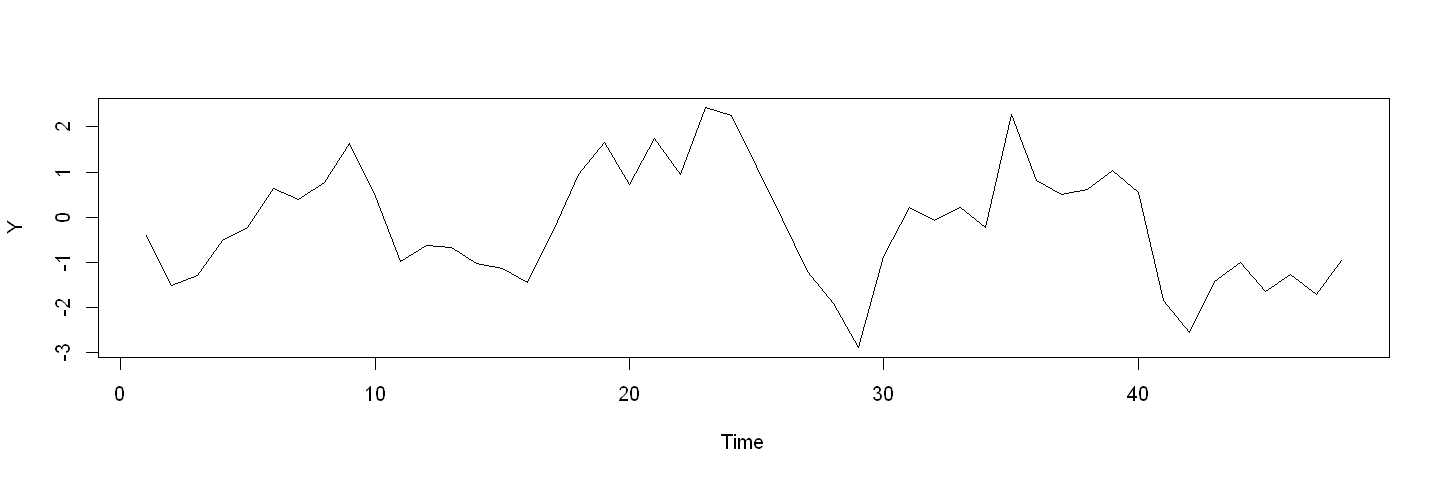

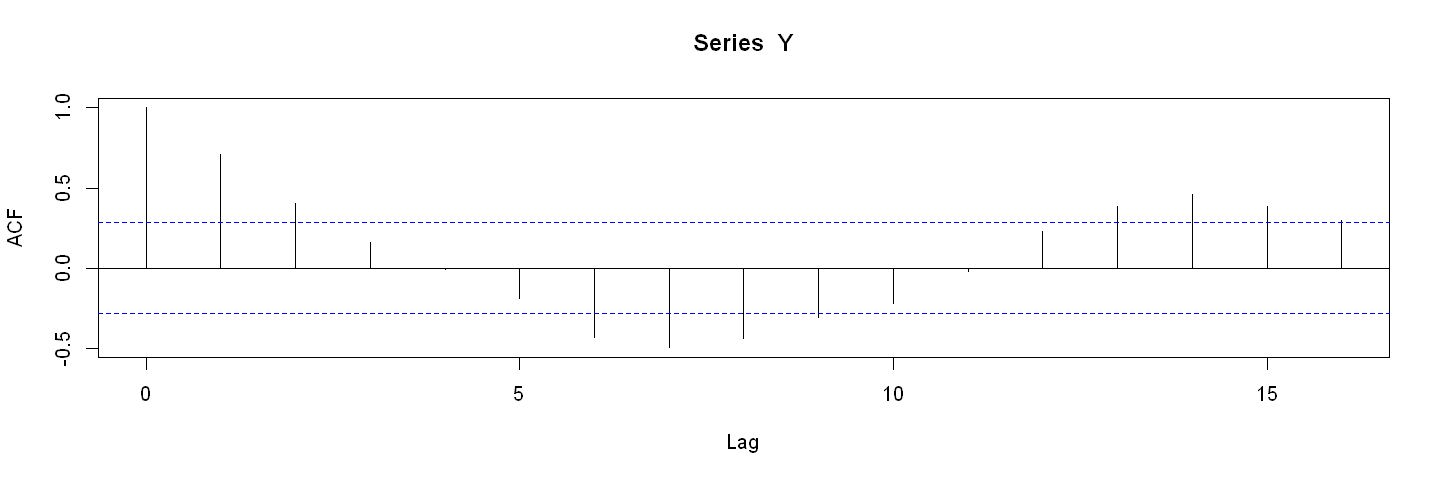

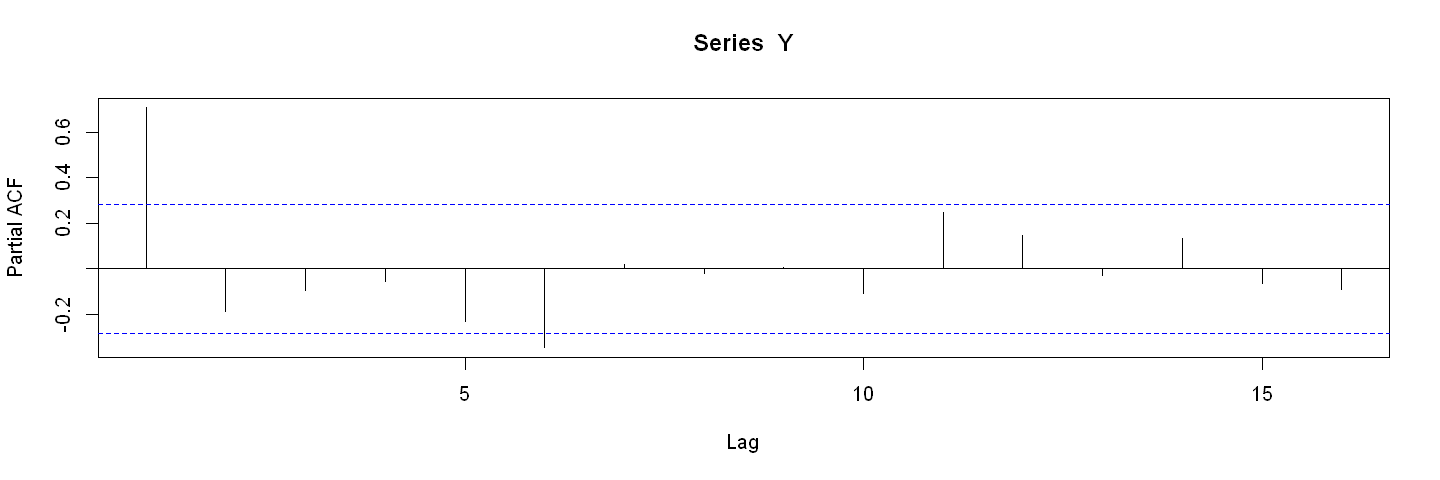

In [4]:
options(repr.plot.width=12, repr.plot.height=4)

plot(Y)
acf(Y)
pacf(Y)

PACF suggests an AR(1) process.

**(a)**

In [5]:
Ya <- Y + c(rep(0, 35), rep(1, 13))

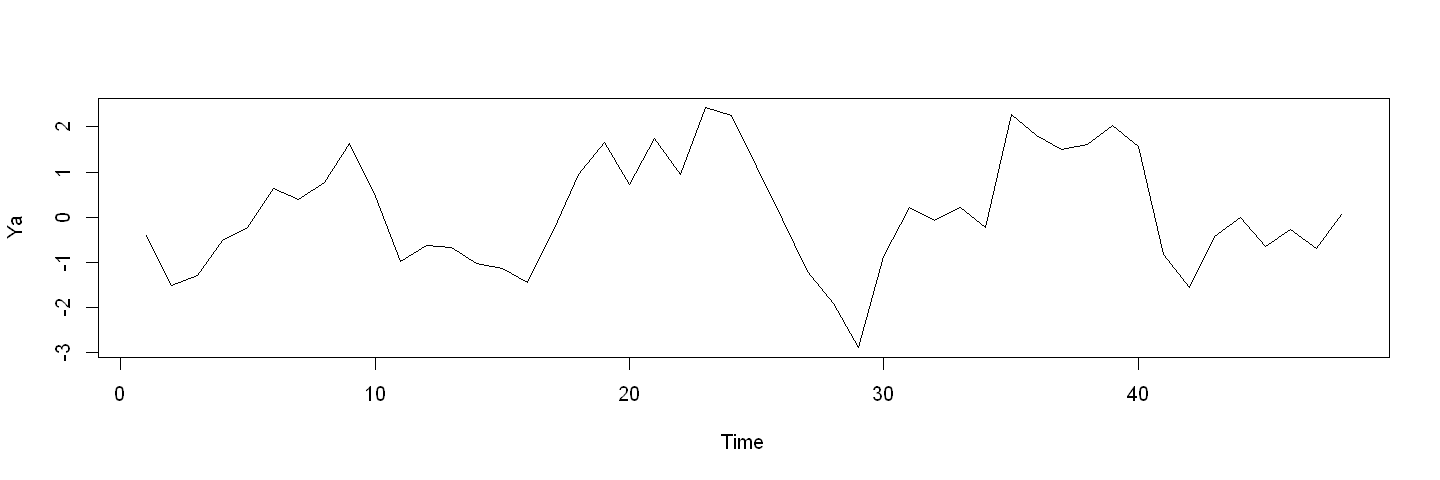

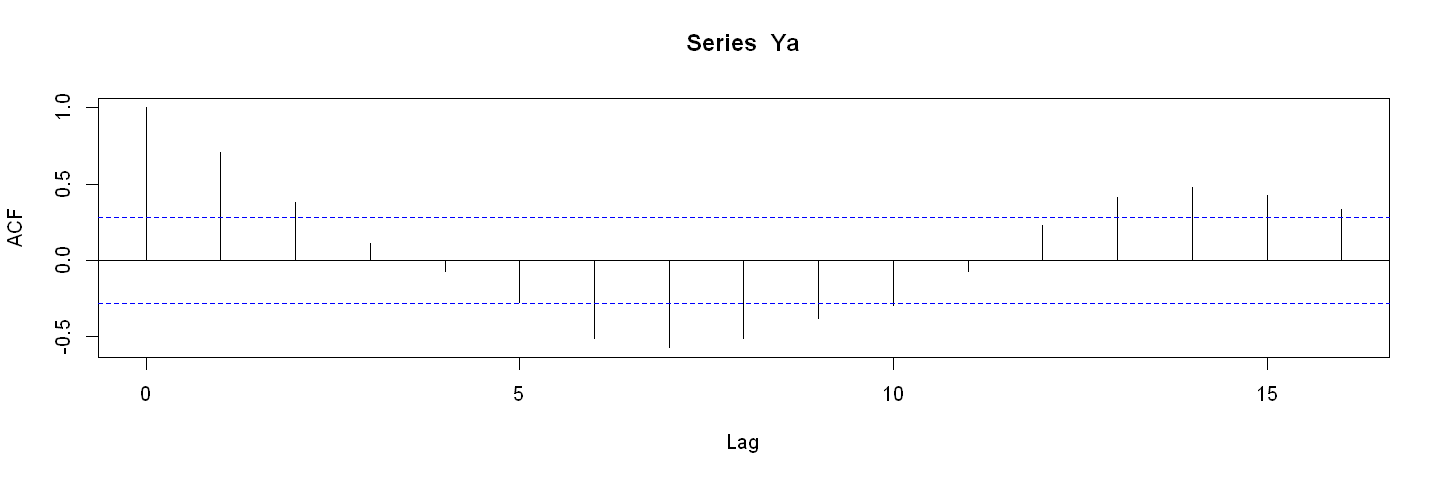

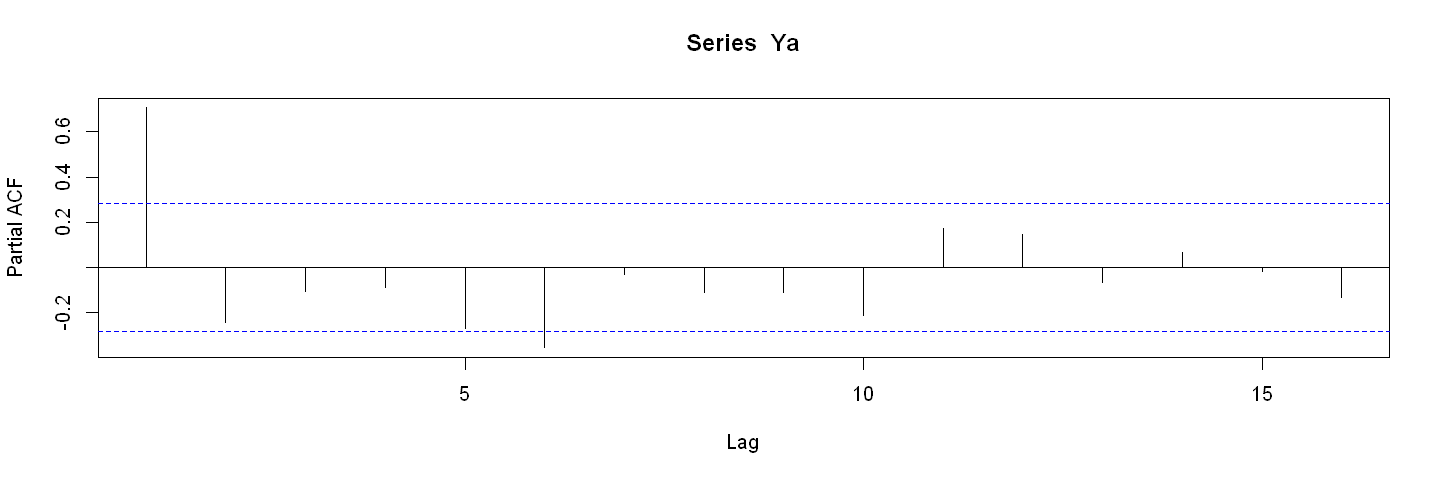

In [6]:
options(repr.plot.width=12, repr.plot.height=4)

plot(Ya)
acf(Ya)
pacf(Ya)

Results look very similar to the original results.

**(b)**

In [7]:
Yb <- Y
Yb[35] = Y[35] + 1

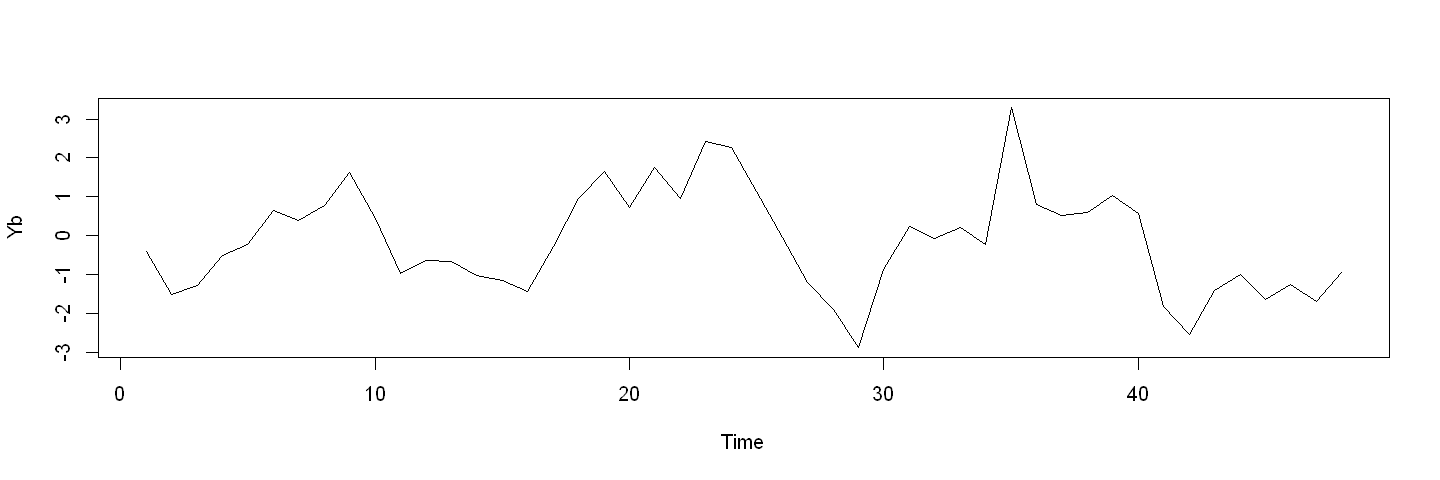

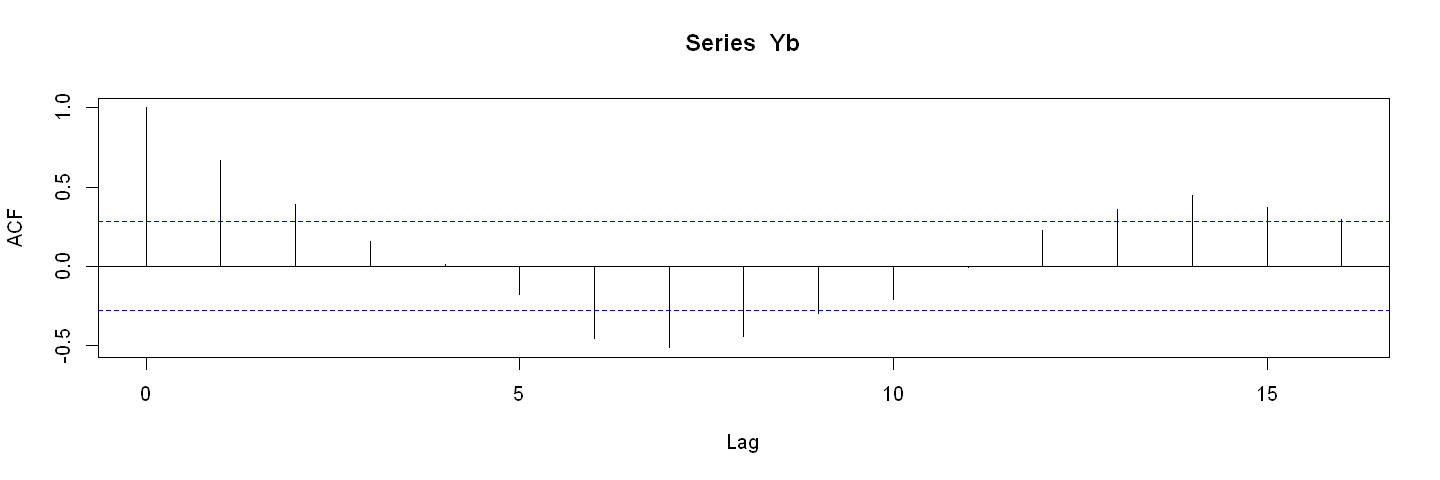

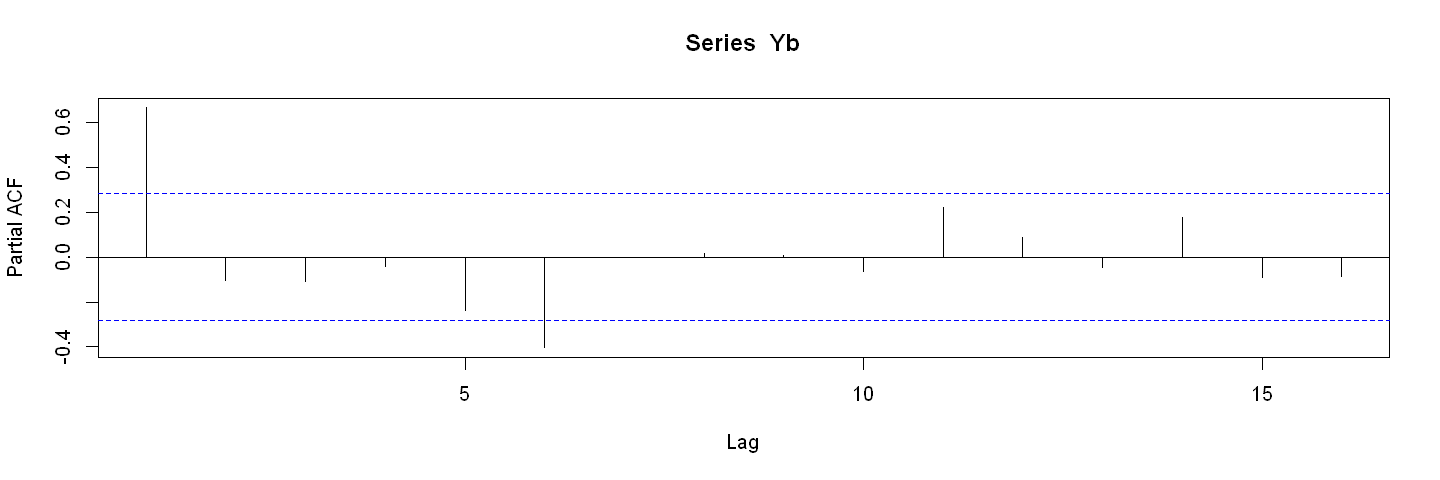

In [8]:
options(repr.plot.width=12, repr.plot.height=4)

plot(Yb)
acf(Yb)
pacf(Yb)

Results look very similar to the original results.

**Exercise 11.15**.  Consider the air passenger miles time series discussed in this chapter.  The file is named `airmiles`.  Use only the preintervention data (that is, data prior to September 2001) for this exercise.

**(a)** Verify that the sample ACF for the twice differenced series of the logarithms of the preintervention data is as shown in Exhibit 11.5 on page 255.

**(b)** The plot created in part (a) suggests an ARIMA$(0,1,1)\times(0,1,0)_{12}$. Fit this model and assess its adequacy. In particular, verify that additive outliers are detected in December 1996, January 1997, and December 2002.

**(c)** Now fit an ARIMA$(0,1,1)\times(0,1,0)_{12}$ + three outliers model and assess its adequacy.

**(d)** Finally, fit an ARIMA$(0,1,1)\times(0,1,1)_{12}$ + three outliers model and assess its adequacy.

**Solution**.

In [9]:
require(zoo)
require(data.table)

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: data.table



In [10]:
data <- fread('../data/airmiles.dat')
data[, 'date' := time(zooreg(1:nrow(data), as.yearmon("1996-01"), freq = 12))]
data = data[data[['date']] < '2001-09']

**(a)**

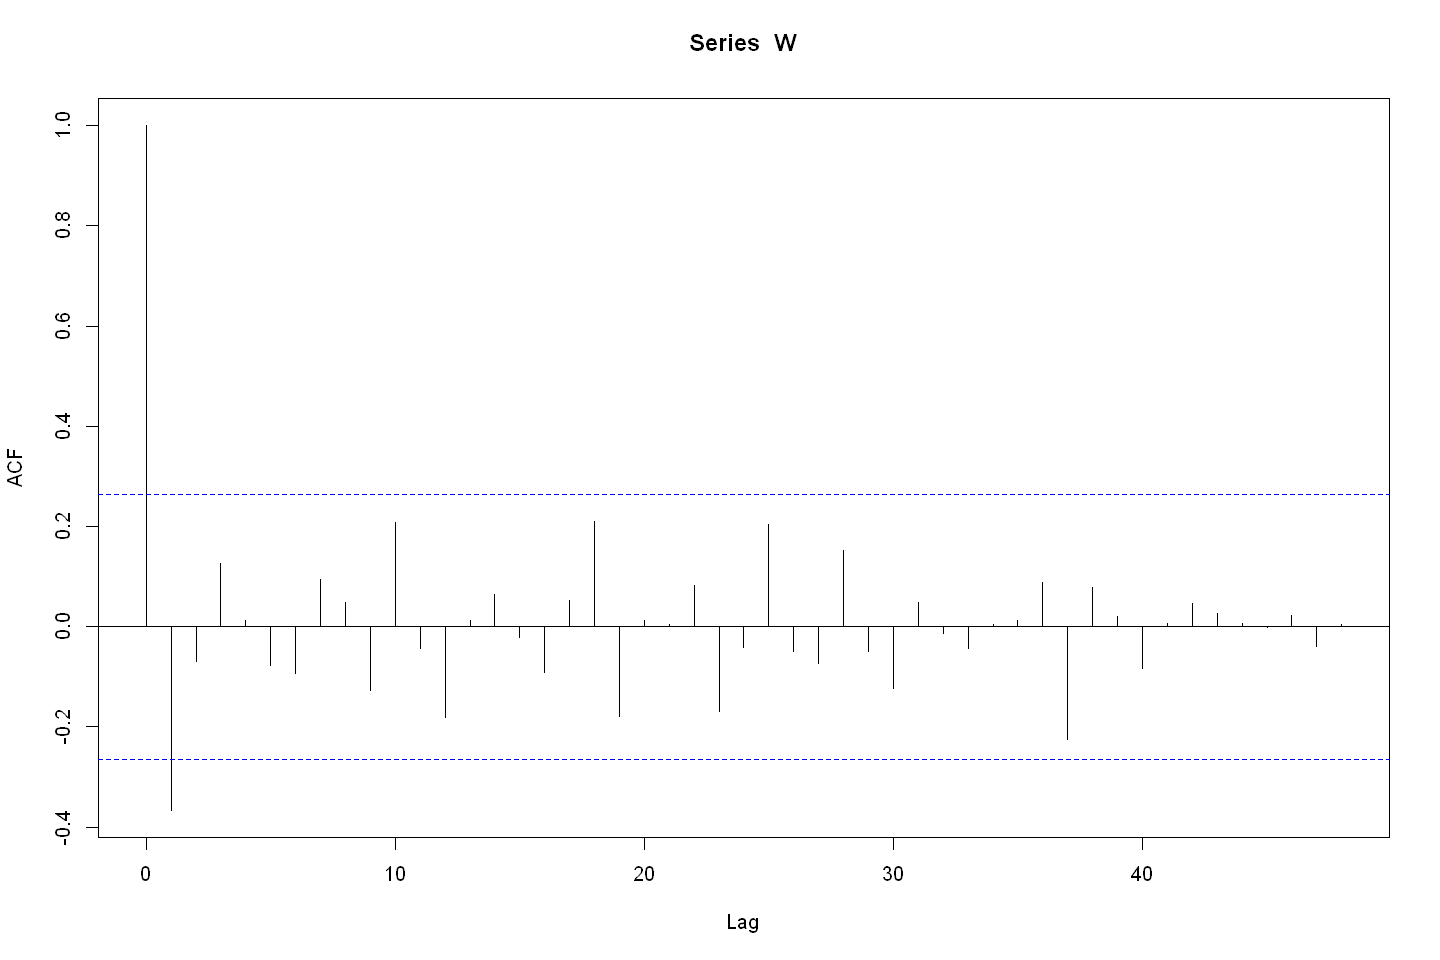

In [11]:
Y = data[['airmiles']]
Z = diff(log(Y))
W = diff(Z, 12)

options(repr.plot.width=12, repr.plot.height=8)
acf(W, lag.max=48)

**(b)**

In [12]:
model = arima(log(Y), order=c(0, 1, 1), seasonal=list(order=c(0, 1, 0), period=12))
model


Call:
arima(x = log(Y), order = c(0, 1, 1), seasonal = list(order = c(0, 1, 0), period = 12))

Coefficients:
          ma1
      -0.4391
s.e.   0.1173

sigma^2 estimated as 0.00143:  log likelihood = 101.98,  aic = -199.96

The coefficient estimate is significant.  Looking at the residuals:

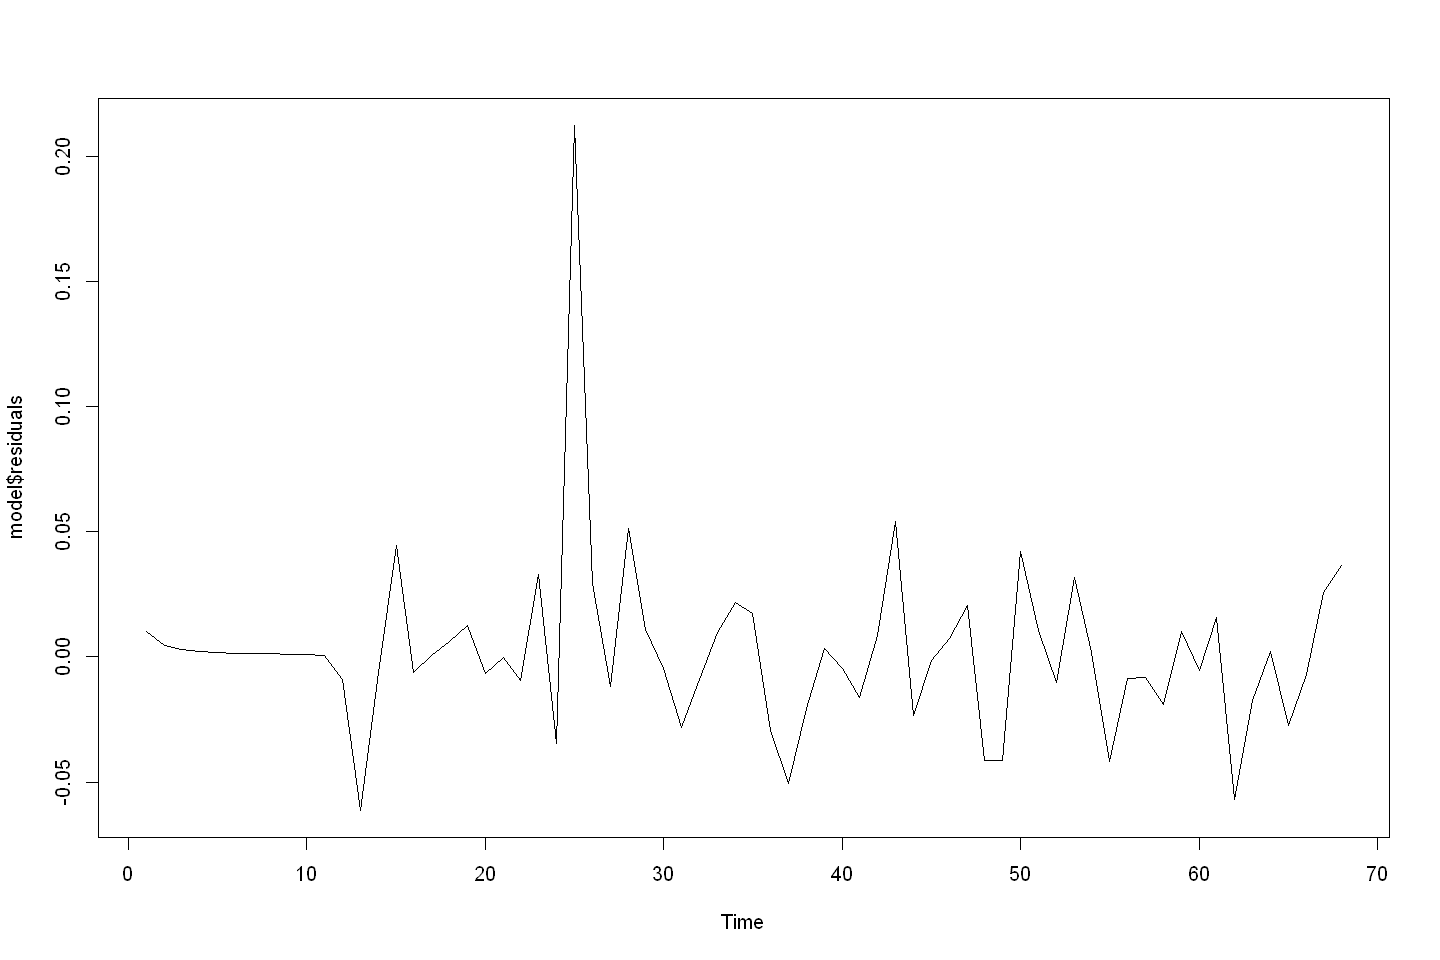

In [13]:
plot(model$residuals)

There seems to be one clear outlier.  Performing outlier detection:

In [14]:
source('outlier_detection.R')

In [15]:
detectAO(model)

             [,1]
ind     25.000000
lambda2  8.114303


In [16]:
detectIO(model)

             [,1]
ind     25.000000
lambda1  8.434743


Both $\hat{\lambda}_1$ and $\hat{\lambda}_2$ are significant at the 5% level for this residual.

**(c)**  We will fit the model with only the one IO residual detected:

In [17]:
xreg = c(rep(0, 24), 1, rep(0, length(Y) - 25))

model = arima(log(Y), order=c(0, 1, 1), seasonal=list(order=c(0, 1, 0), period=12), xreg=xreg)
model


Call:
arima(x = log(Y), order = c(0, 1, 1), seasonal = list(order = c(0, 1, 0), period = 12), 
    xreg = xreg)

Coefficients:
          ma1    xreg
      -0.3569  0.0837
s.e.   0.1189  0.0190

sigma^2 estimated as 0.001069:  log likelihood = 110.03,  aic = -214.06

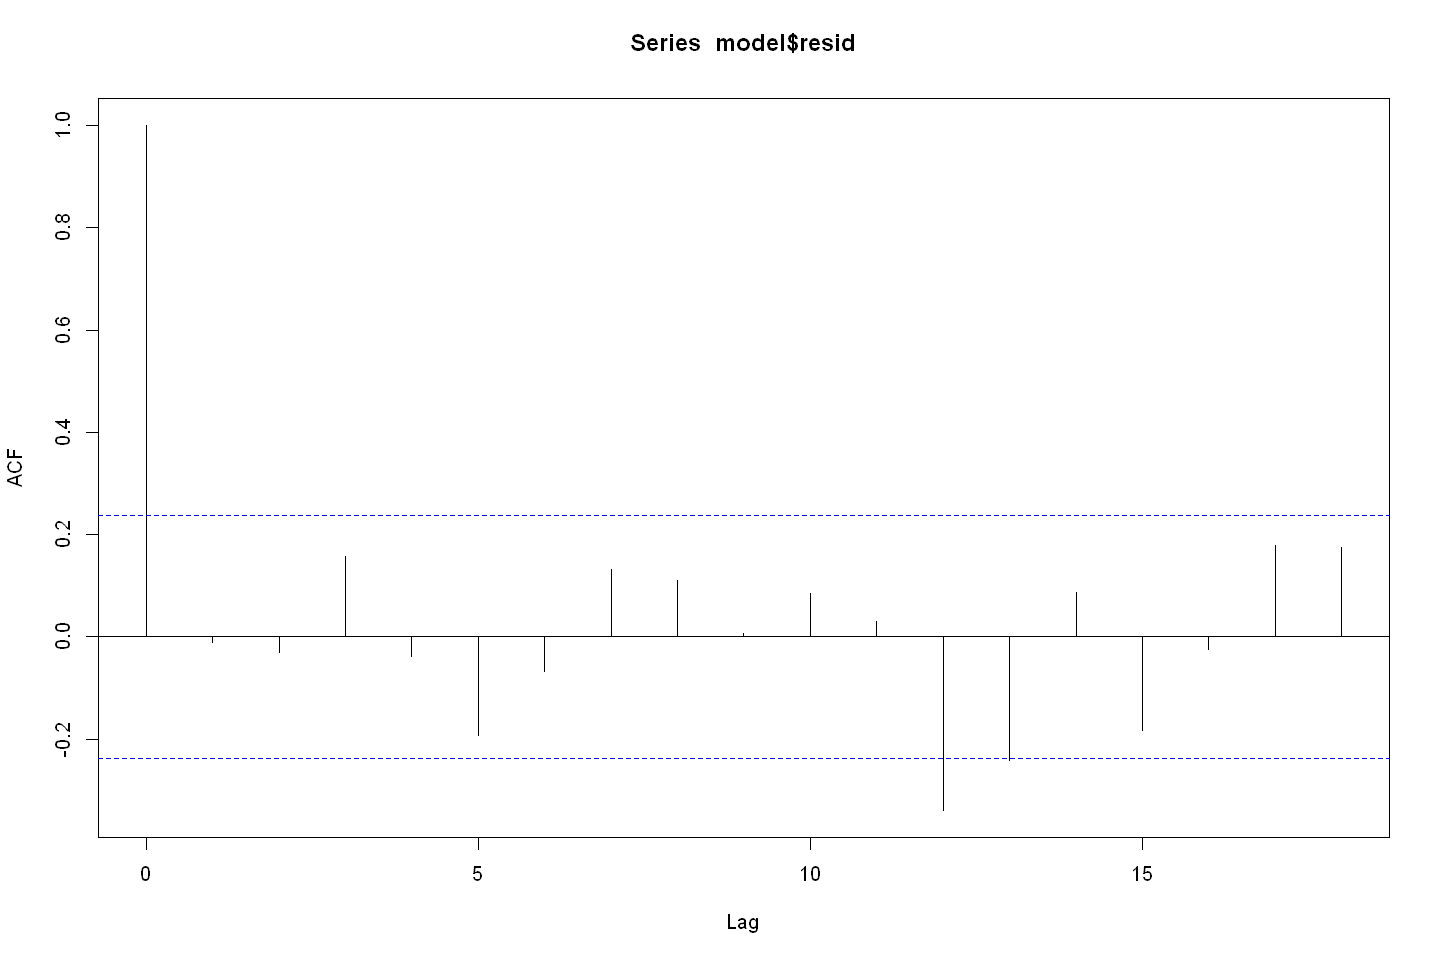

In [18]:
options(repr.plot.width=12, repr.plot.height=8)
acf(model$resid)

ACF still indicates a significant autocorrelation at lag 12, showing some seasonality may have not been captured.

**(d)**  We will now fit the model with $Q = 1$:

In [19]:
xreg = c(rep(0, 24), 1, rep(0, length(Y) - 25))

model = arima(log(Y), order=c(0, 1, 1), seasonal=list(order=c(0, 1, 1), period=12), xreg=xreg)
model


Call:
arima(x = log(Y), order = c(0, 1, 1), seasonal = list(order = c(0, 1, 1), period = 12), 
    xreg = xreg)

Coefficients:
          ma1     sma1    xreg
      -0.4053  -0.3110  0.0852
s.e.   0.1152   0.1678  0.0214

sigma^2 estimated as 0.0009753:  log likelihood = 111.91,  aic = -215.82

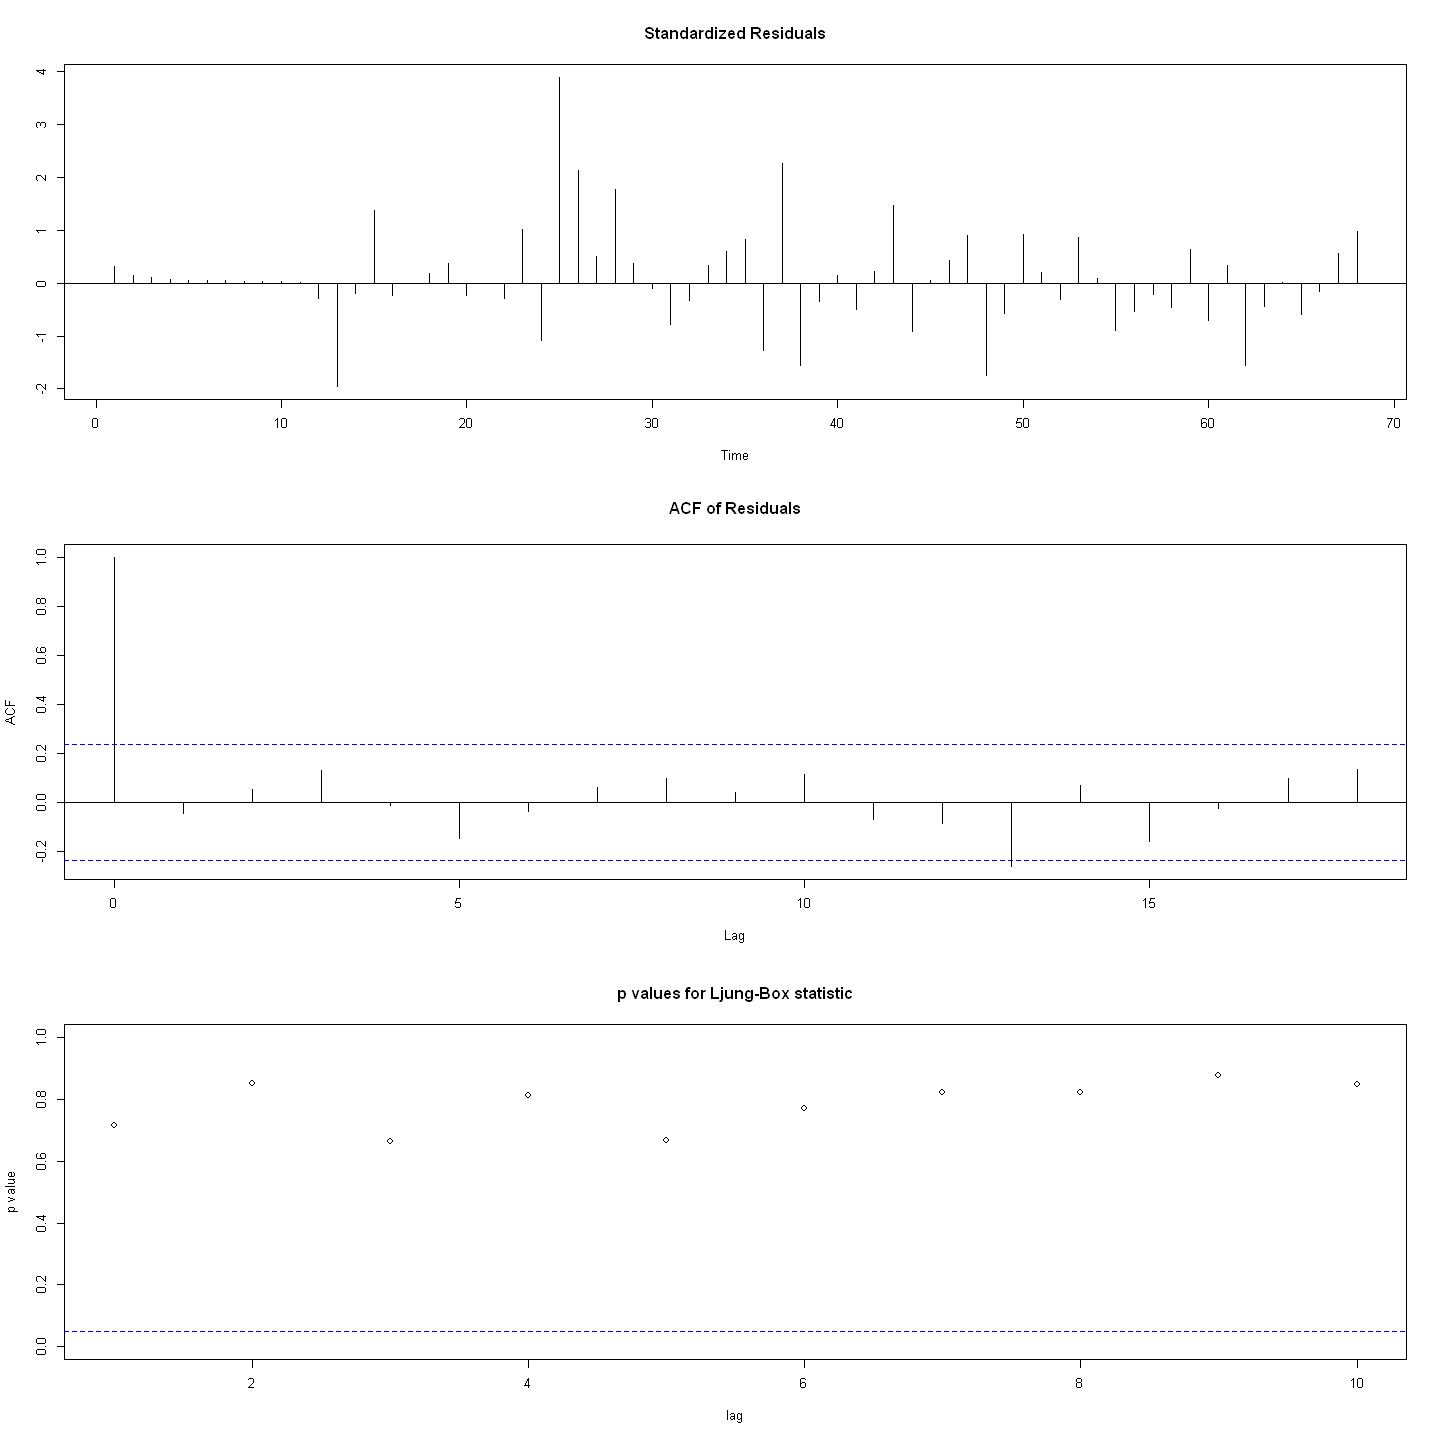

In [20]:
options(repr.plot.width=12, repr.plot.height=12)
tsdiag(model)

The ACF for lag 12 is now gone -- though the ACF for lag 13 is slightly over the significance threshold.

**Exercise 11.16**.  Use the logarithms of the Denver region public transportation boardings and Denver gasoline price series.  The data are in the file named `boardings`.

**(a)** Display the time series plot of the monthly boardings using seasonal plotting symbols.  Interpret the plot.

**(b)** Display the time series plot of the monthly average gasoline prices using seasonal plotting symbols.  Interpret the plot.

**Solution**.

In [21]:
source('utils.R')

Loading required package: ggplot2

Loading required package: tseries

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [22]:
data <- read.csv('../data/boardings.dat', sep=' ')
data['date'] = time(zooreg(1:nrow(data), as.yearmon("2000-08"), freq = 12))

**(a)**

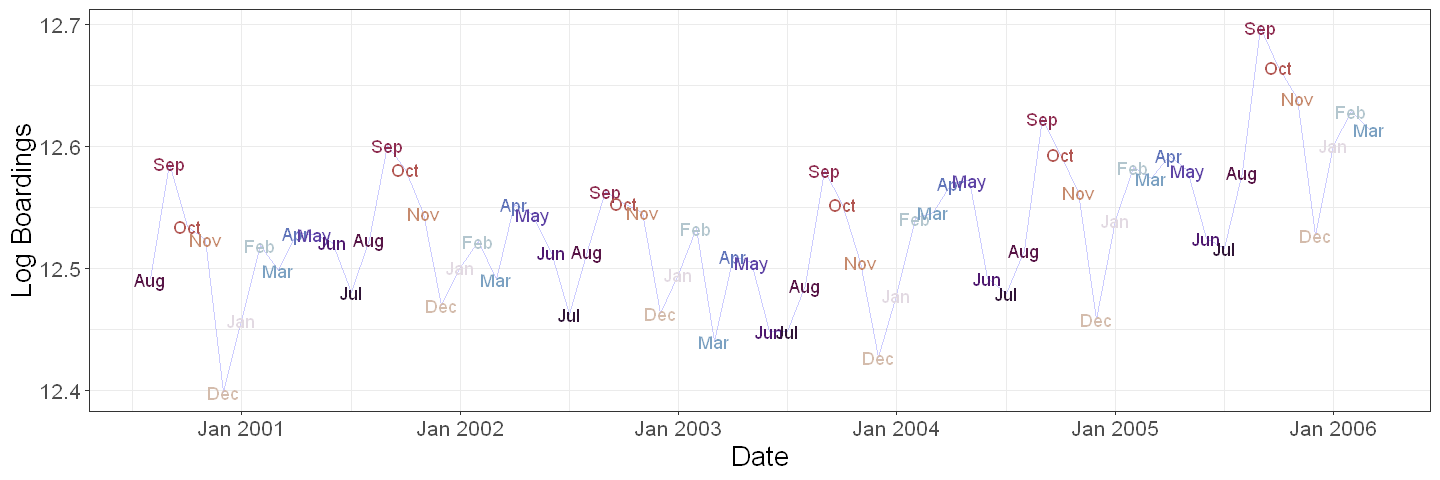

In [23]:
options(repr.plot.width=12, repr.plot.height=4)
plot_monthly(data[['date']], data[['log.boardings']], 'Date', 'Log Boardings')

We see seasonality and some non-stationarity -- an apparent growth trend after 2004.

**(b)**

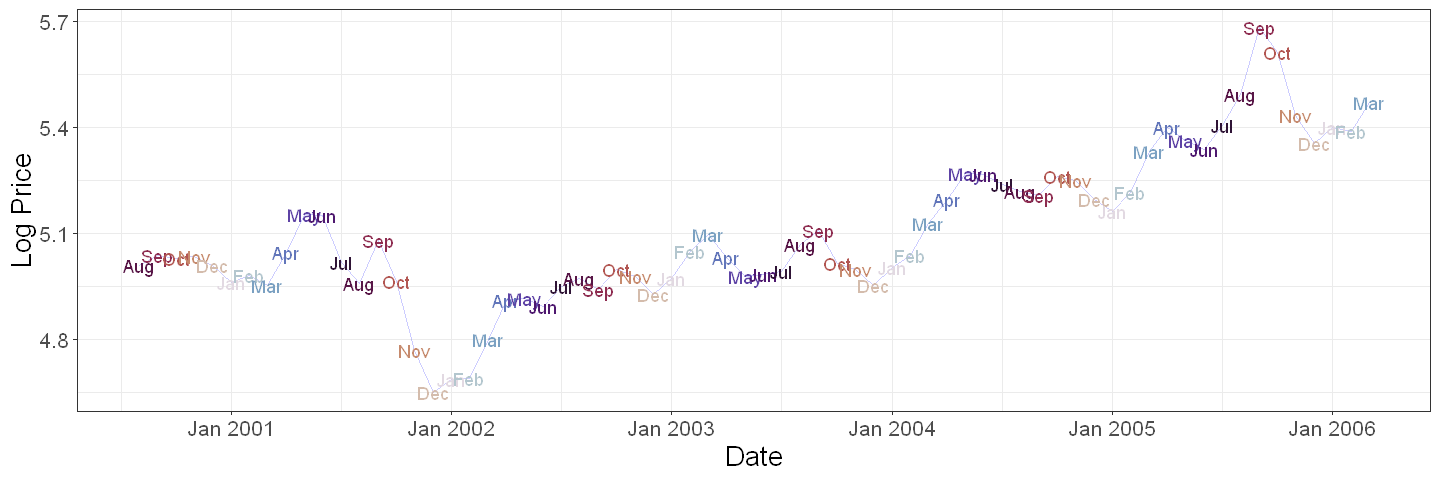

In [24]:
options(repr.plot.width=12, repr.plot.height=4)
plot_monthly(data[['date']], data[['log.price']], 'Date', 'Log Price')

We see some seasonality, a growth trend, and some potential outliers.

**Exercise 11.17**.  The data file named `deere1` contains 82 consecutive values for the amount of deviation (in 0.000025 inch units) from a specified target value that an industrial machining process at Deere & Co. produced under certain specified operating conditions.  These data were first used in Exercise 6.33, page 146, where we observed an obvious outlier at time $t = 27$.

**(a)** Fit an AR(2) model using the original data including the outlier.

**(b)** Test the fitted AR(2) model of part (a) for both AO and IO outliers.

**(c)** Now fit the AR(2) model incorporating a term in the model for the outlier.

**(d)** Assess the fit of the model in part (c) using all of our diagnostic tools. In particular, compare the properties of this model with the one obtained in part (a).

**Solution**.

In [25]:
Y <- read.csv('../data/deere1.dat')[['deere1']]

**(a)**

In [26]:
model = arima(Y, order=c(2, 0, 0))
model


Call:
arima(x = Y, order = c(2, 0, 0))

Coefficients:
         ar1     ar2  intercept
      0.0269  0.2392     1.4135
s.e.  0.1062  0.1061     0.6275

sigma^2 estimated as 17.68:  log likelihood = -234.19,  aic = 476.38

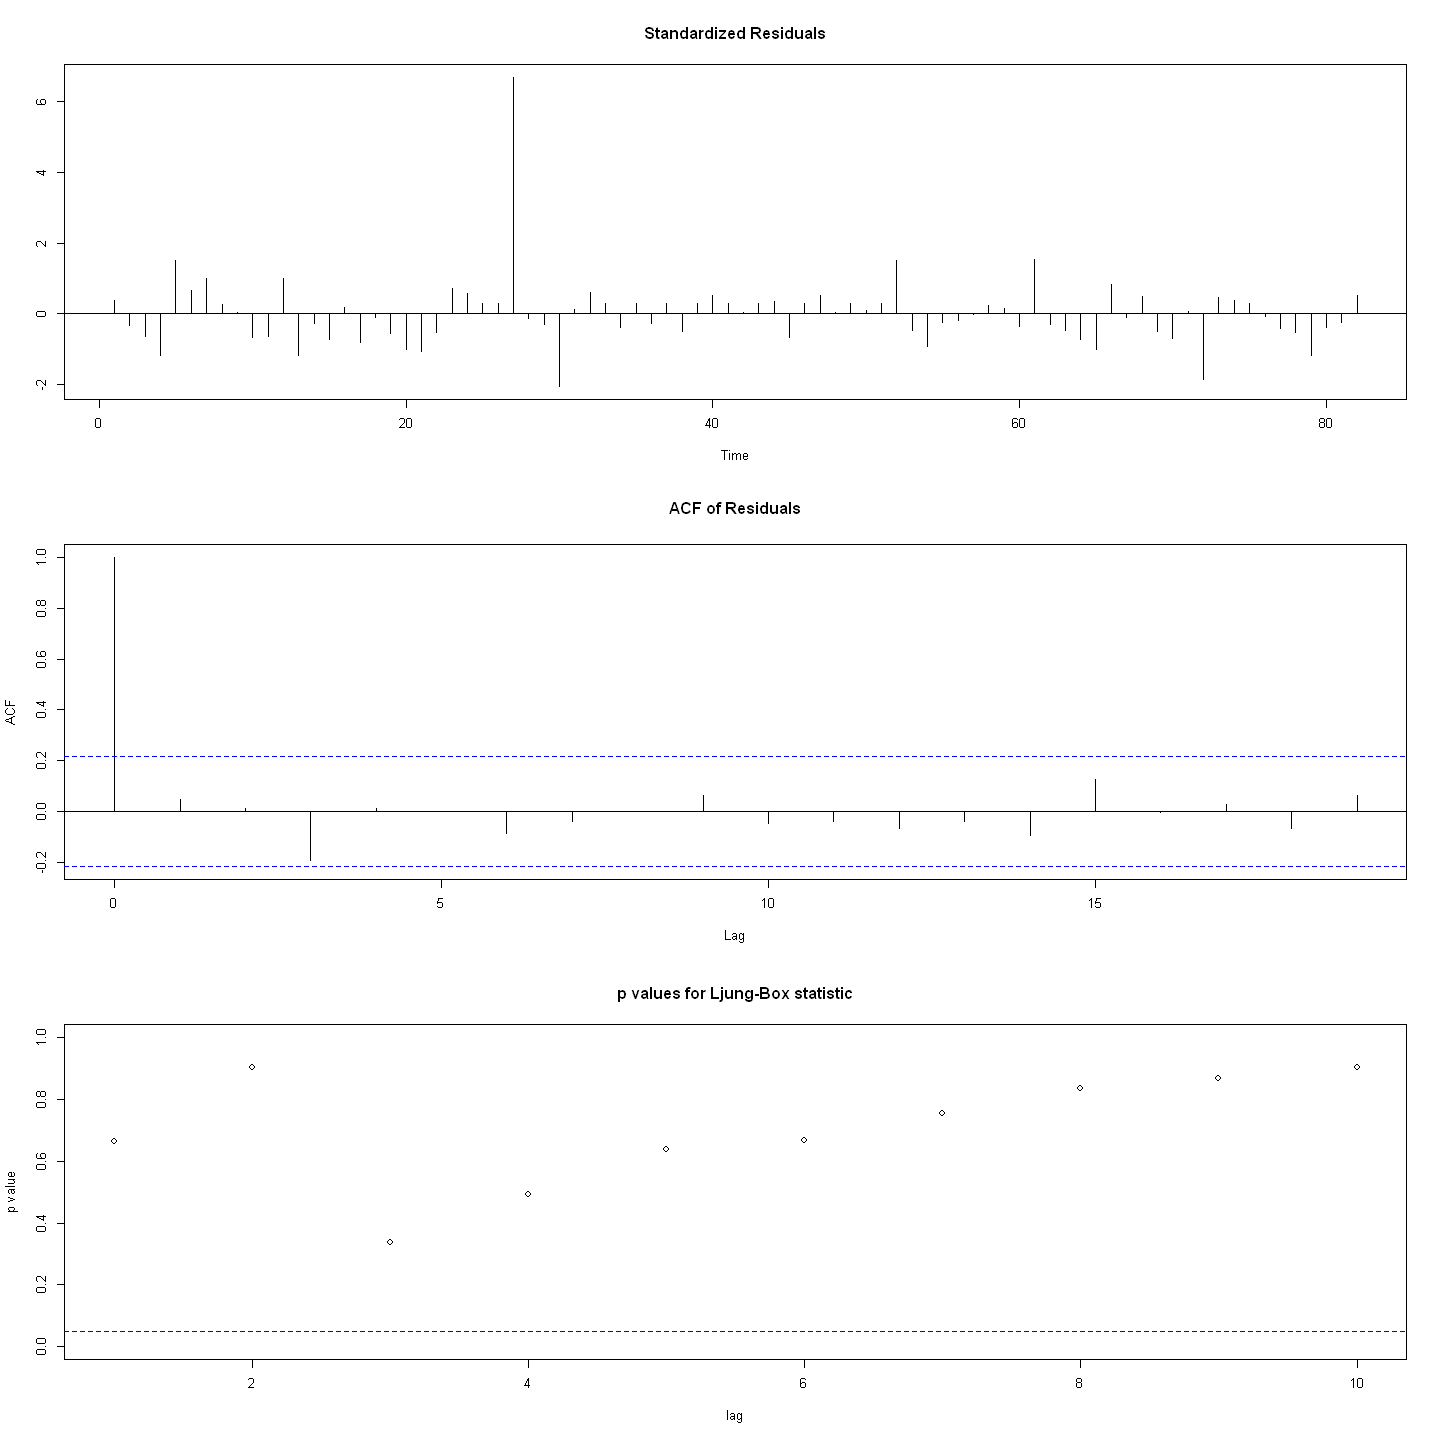

In [27]:
options(repr.plot.width=12, repr.plot.height=12)
tsdiag(model)

**(b)**

In [28]:
detectAO(model)

             [,1]
ind     27.000000
lambda2  8.668582


In [29]:
detectIO(model)

             [,1]
ind     27.000000
lambda1  8.816551


Both $\hat{\lambda}_1$ and $\hat{\lambda}_2$ are significant at the 5% level.

**(c and d)**

In [30]:
xreg = rep(0, length(Y))
xreg[27] = 1

model = arima(Y, order=c(2, 0, 0), xreg=xreg)
model


Call:
arima(x = Y, order = c(2, 0, 0), xreg = xreg)

Coefficients:
          ar1     ar2  intercept     xreg
      -0.0143  0.2388     1.0848  27.1751
s.e.   0.1070  0.1103     0.4079   2.9114

sigma^2 estimated as 8.259:  log likelihood = -202.98,  aic = 415.95

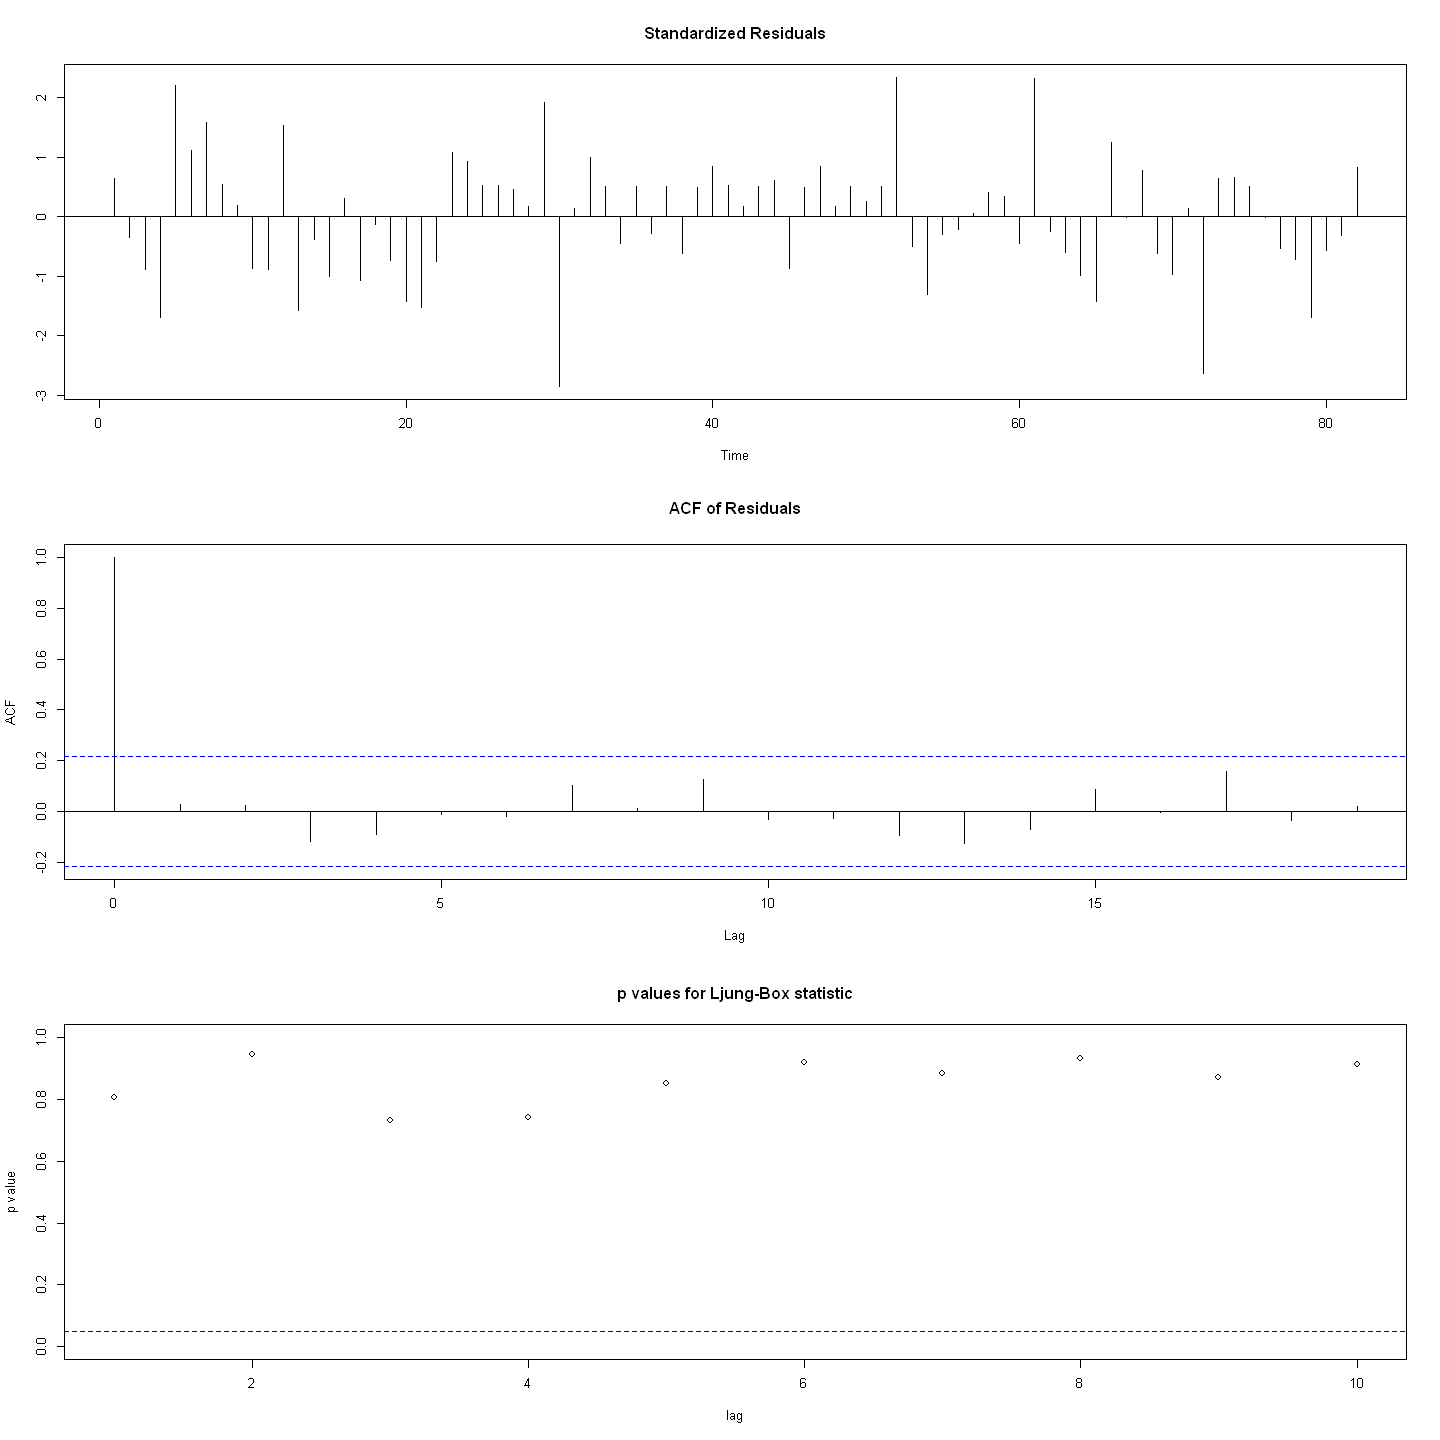

In [31]:
options(repr.plot.width=12, repr.plot.height=12)
tsdiag(model)

In [32]:
detectAO(model)

[1] "No AO detected"


In [33]:
detectIO(model)

[1] "No IO detected"


In [34]:
shapiro.test(model$resid)


	Shapiro-Wilk normality test

data:  model$resid
W = 0.97977, p-value = 0.2223


Incorporating the outlier seems to remove the outlier from the detection criteria.  ACF plot still indicates no obvious significant correlations, and Shapiro-Wilk fails to reject normality on the residuals.

**Exercise 1.18**.  The data file named `days` contains accounting data from the Winegard Co. of Burlington, Iowa. The data are the number of days until Winegard receives payment for 130 consecutive orders from a particular distributor of Winegard products.  (The name of the distributor must remain anonymous for confidentiality reasons.)  These data were first investigated in Exercise 6.39, page 147, but several outliers were observed. When the observed outliers were replaced by more typical values, an MA(2) model was suggested.

**(a)** Fit an MA(2) model to the original data, and test the fitted model for both AO and IO outliers.

**(b)** Now fit the MA(2) model incorporating the outliers into the model.

**(c)** Assess the fit of the model obtained in part (b). In particular, are any more outliers indicated?

**(d)** Fit another MA(2) model incorporating any additional outliers found in part (c), and assess the fit of this model.

**Solution**.

In [35]:
Y <- read.csv('../data/days.dat')[['days']]

**(a)**

In [36]:
model = arima(Y, order=c(0, 0, 2))
model


Call:
arima(x = Y, order = c(0, 0, 2))

Coefficients:
         ma1     ma2  intercept
      0.1113  0.1557    28.6931
s.e.  0.0894  0.0884     0.7946

sigma^2 estimated as 51.33:  log likelihood = -440.48,  aic = 888.95

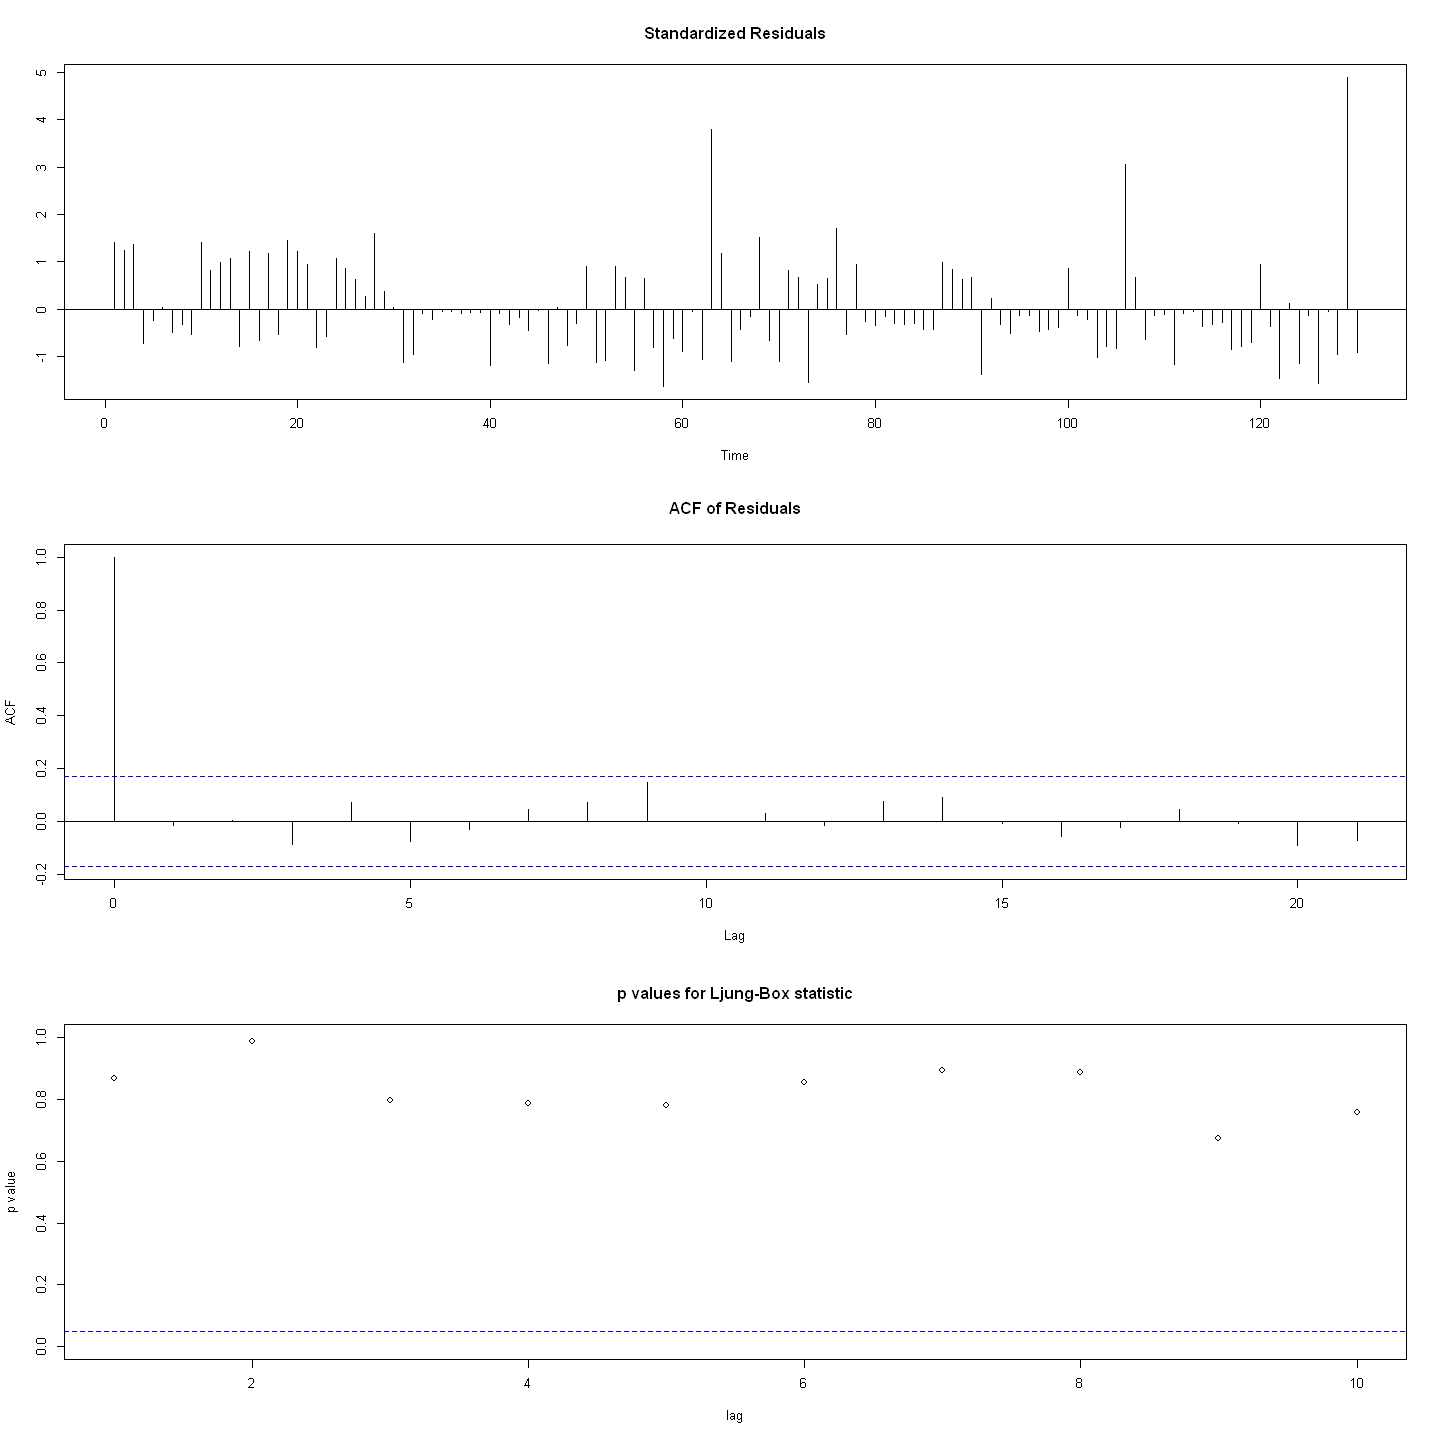

In [37]:
options(repr.plot.width=12, repr.plot.height=12)
tsdiag(model)

In [38]:
detectAO(model)

             [,1]       [,2]
ind     63.000000 129.000000
lambda2  4.009568   5.344322


In [39]:
detectIO(model)

             [,1]       [,2]
ind     63.000000 129.000000
lambda1  4.081066   5.268322


Two outliers were detected with $\hat{\lambda}_1$ and $\hat{\lambda}_2$ at the 5% significance level.

**(b)**

In [40]:
xreg = data.frame(AO=as.numeric(seq(Y)>=129), IO=as.numeric(seq(Y)==63))

model = arima(Y, order=c(0, 0, 2), xreg=xreg)
model


Call:
arima(x = Y, order = c(0, 0, 2), xreg = xreg)

Coefficients:
         ma1     ma2  intercept       AO       IO
      0.0822  0.1783    28.1899  16.7083  26.7320
s.e.  0.0932  0.0793     0.7213   4.8257   6.3899

sigma^2 estimated as 41.91:  log likelihood = -427.31,  aic = 866.62

**(c and d)**

In [41]:
detectAO(model)

[1] "No AO detected"


In [42]:
detectIO(model)

[1] "No IO detected"


No further outliers were detected.

**Exercise 11.19**.  The data file named `bluebirdlite` contains weekly sales and price data for Bluebird Lite potato chips.  Carry out an analysis similar to that for Bluebird Standard potato chips that was begun on page 267.

**Solution**.

In [43]:
data <- fread('../data/bluebirdlite.dat')

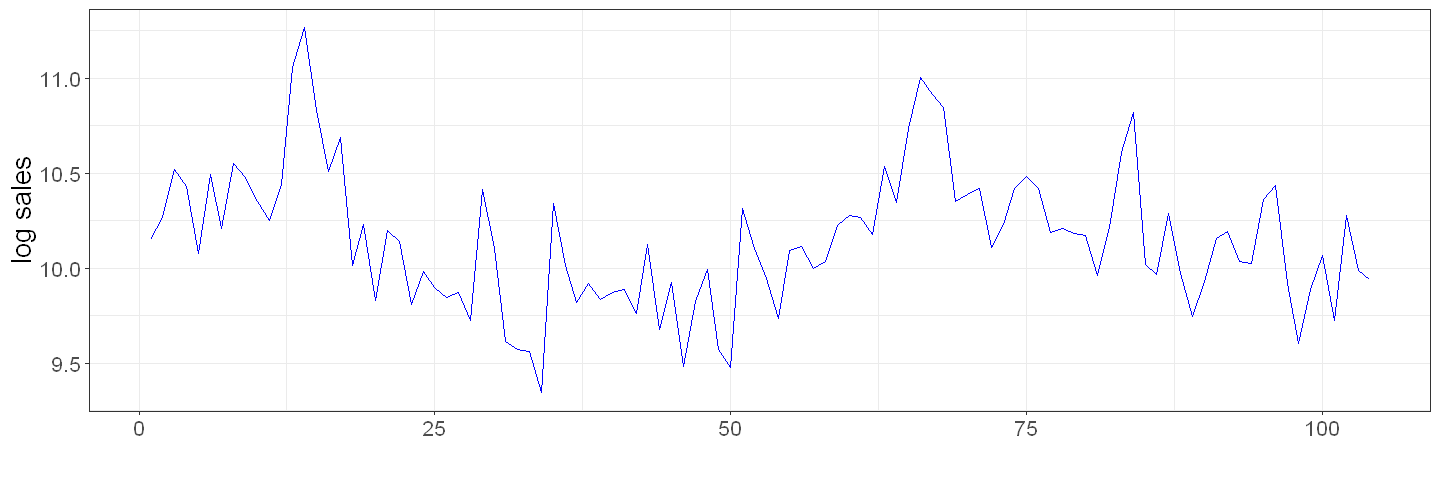

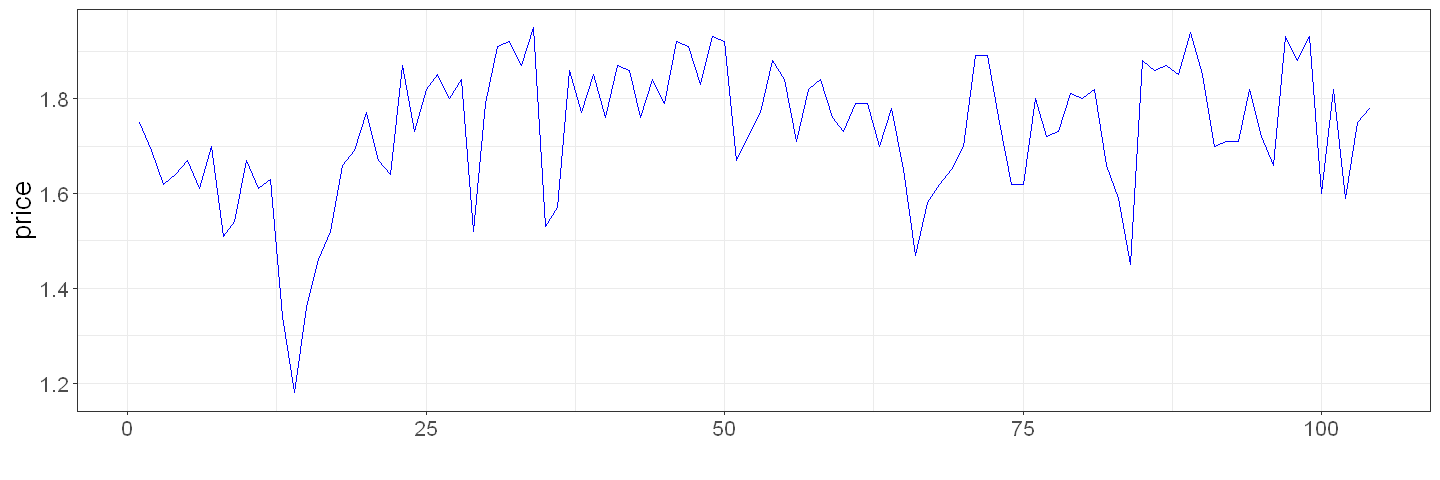

In [44]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot(data) + 
  geom_line(aes(x = 1:nrow(data), y = log.sales), color="blue") + 
  xlab('') + ylab('log sales') +
  theme_bw() + theme(text = element_text(size=16))

ggplot(data) + 
  geom_line(aes(x = 1:nrow(data), y = price), color="blue") + 
  xlab('') + ylab('price') +
  theme_bw() + theme(text = element_text(size=16))

In [45]:
source('prewhiten.R')

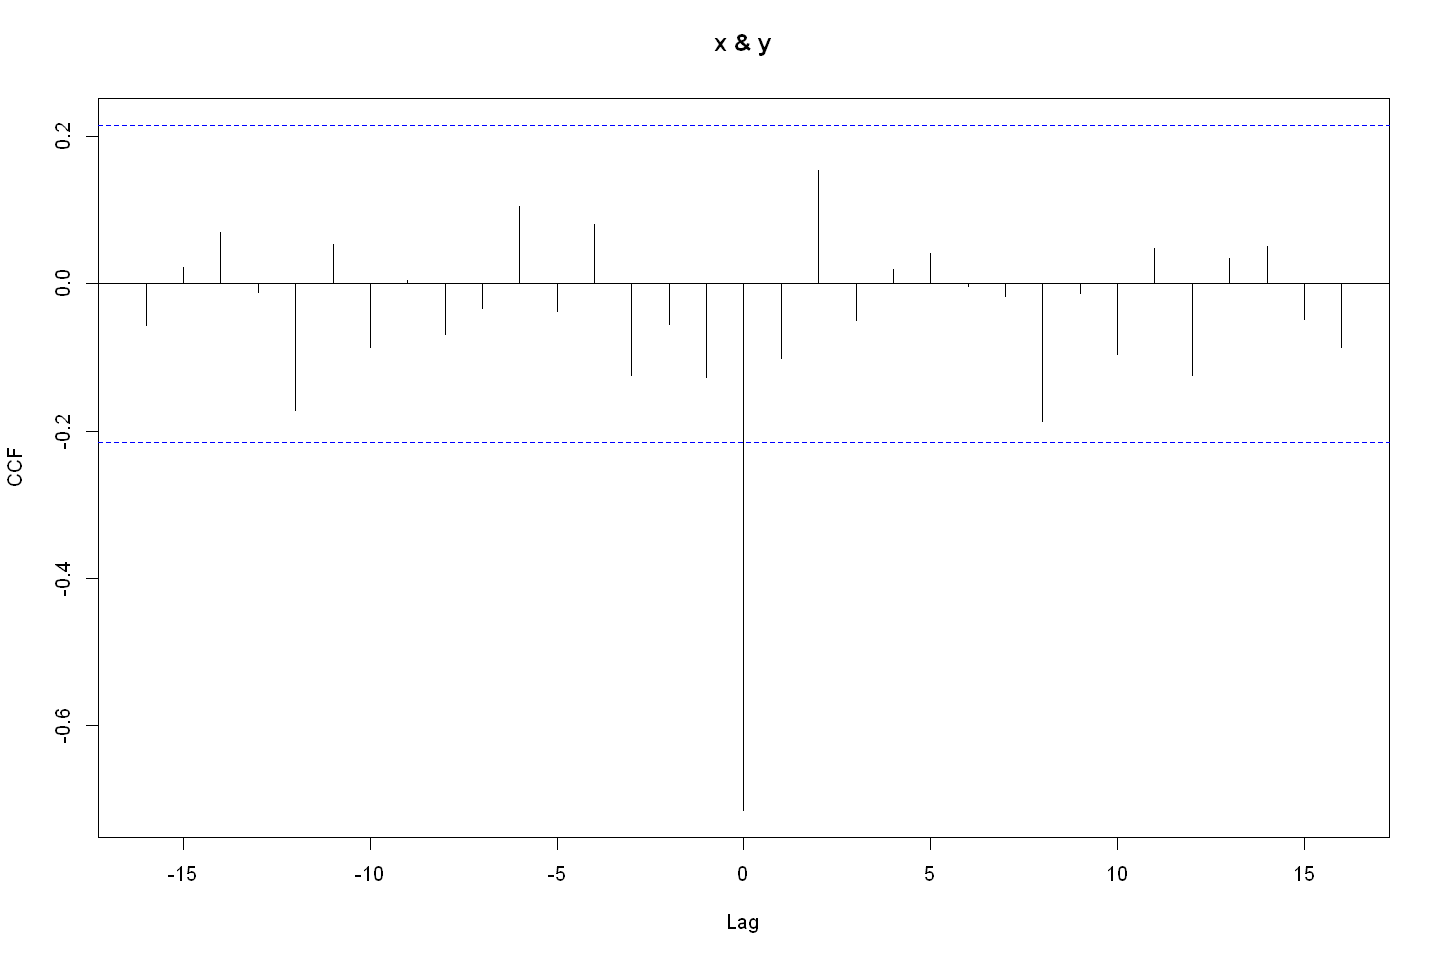

In [46]:
options(repr.plot.width=12, repr.plot.height=8)
prewhiten(y=diff(data[['log.sales']]), x=diff(data[['price']]), ylab='CCF')

As in the original analysis, after differencing and using prewhitened data, the CCF is significant only at lag 0, suggesting a strong contemporaneous negative relationship between lag 1 of price and sales.  Higher prices are associated with lower sales.

In [47]:
model.m1 = lm(log.sales ~ price, data=data)
summary(model.m1)


Call:
lm(formula = log.sales ~ price, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.47884 -0.13992  0.01661  0.11243  0.60085 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  13.7894     0.2345   58.81   <2e-16 ***
price        -2.1000     0.1348  -15.57   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1963 on 102 degrees of freedom
Multiple R-squared:  0.7039,	Adjusted R-squared:  0.701 
F-statistic: 242.5 on 1 and 102 DF,  p-value: < 2.2e-16


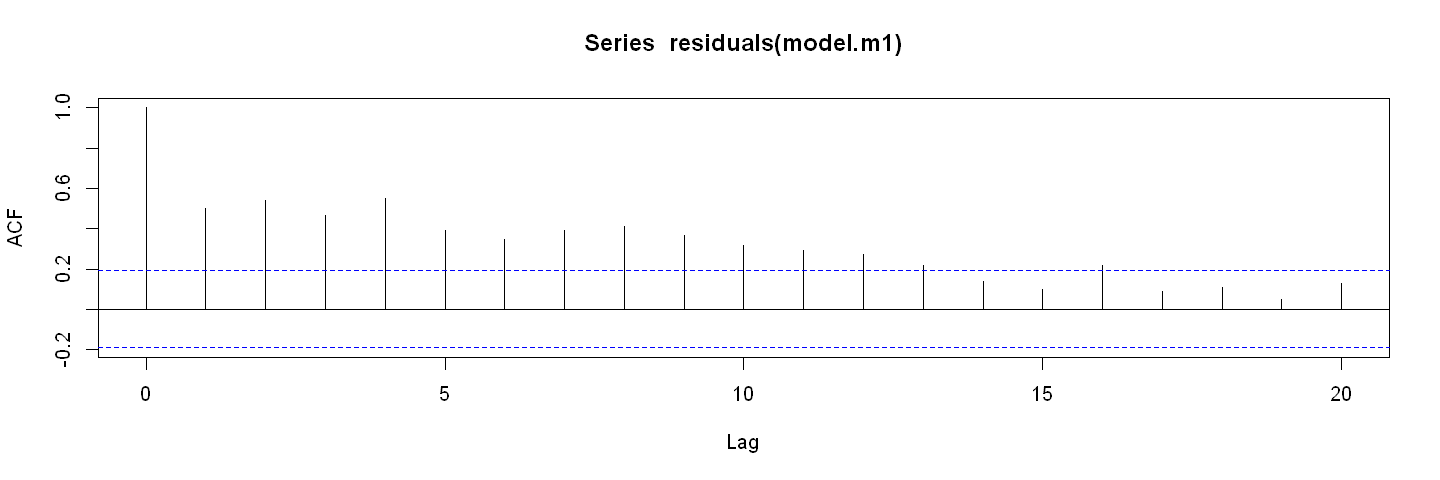

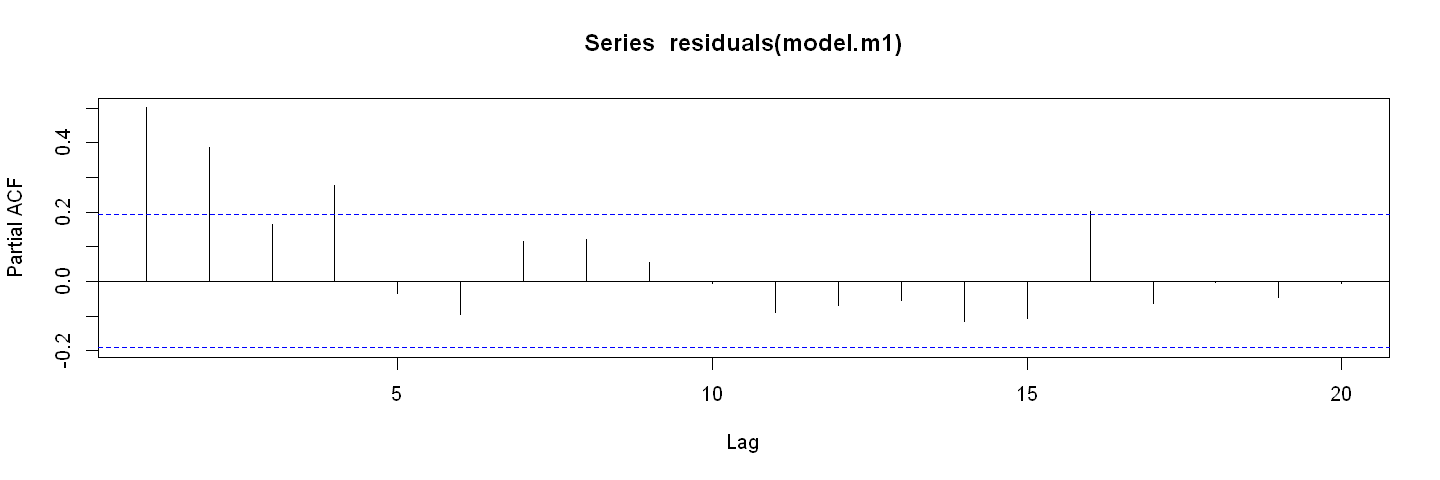

In [48]:
options(repr.plot.width=12, repr.plot.height=4)

acf(residuals(model.m1))
pacf(residuals(model.m1))

We estimate a simple OLS between log sales and price.  The residuals are, however, correlated, as seen in the sample ACF and PACF charts.

In [49]:
source('eacf.R')

In [50]:
eacf(residuals(model.m1))

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x x x x x x x x x x x  x  x  o 
1 x o o x o o o o o o o  o  o  o 
2 x x o x o x o o o o o  o  o  o 
3 x x o x o o o o o o o  o  o  o 
4 o x x o o o o o o o o  o  o  o 
5 o o x o o o o o o o o  o  o  o 
6 x x x x o o o o o o o  o  o  o 
7 x o o o o o o o o o o  o  o  o 


EACF suggests an ARMA(1, 5) model.  Fitting the model and looking for significant coefficients, $\phi$,  $\theta_1$ and $\theta_3$ and $\theta_5$ are not significant, so we refit a MA(4) model setting $\theta_1$ and $\theta_3$ to zero.

In [51]:
model.m2 = arima(data[['log.sales']], order=c(1, 0, 5), xreg=data[['price']])
print(model.m2)


Call:
arima(x = data[["log.sales"]], order = c(1, 0, 5), xreg = data[["price"]])

Coefficients:
         ar1     ma1     ma2     ma3     ma4     ma5  intercept
      0.0692  0.1867  0.3566  0.2777  0.5401  0.2461    13.4199
s.e.  0.6383  0.6373  0.1296  0.1739  0.2157  0.3771     0.1594
      data[["price"]]
              -1.8856
s.e.           0.0893

sigma^2 estimated as 0.02094:  log likelihood = 52.49,  aic = -86.98


In [52]:
require(lmtest)

Loading required package: lmtest



In [53]:
coeftest(model.m2)


z test of coefficients:

                 Estimate Std. Error  z value  Pr(>|z|)    
ar1              0.069191   0.638250   0.1084  0.913672    
ma1              0.186712   0.637303   0.2930  0.769543    
ma2              0.356635   0.129597   2.7519  0.005926 ** 
ma3              0.277683   0.173861   1.5972  0.110231    
ma4              0.540065   0.215674   2.5041  0.012277 *  
ma5              0.246089   0.377126   0.6525  0.514054    
intercept       13.419899   0.159364  84.2091 < 2.2e-16 ***
data[["price"]] -1.885625   0.089344 -21.1052 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [54]:
model.m3 = arima(data[['log.sales']], order=c(0, 0, 4), xreg=data[['price']], fixed=c(0, NA, 0, NA, NA, NA))
print(model.m3)
coeftest(model.m3)


Call:
arima(x = data[["log.sales"]], order = c(0, 0, 4), xreg = data[["price"]], fixed = c(0, 
    NA, 0, NA, NA, NA))

Coefficients:
      ma1     ma2  ma3     ma4  intercept  data[["price"]]
        0  0.4354    0  0.5451    13.5306          -1.9505
s.e.    0  0.0827    0  0.0926     0.1785           0.1016

sigma^2 estimated as 0.0236:  log likelihood = 46.45,  aic = -82.9



z test of coefficients:

                 Estimate Std. Error  z value  Pr(>|z|)    
ma2              0.435358   0.082691   5.2649 1.403e-07 ***
ma4              0.545149   0.092648   5.8841 4.003e-09 ***
intercept       13.530557   0.178486  75.8073 < 2.2e-16 ***
data[["price"]] -1.950464   0.101634 -19.1910 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


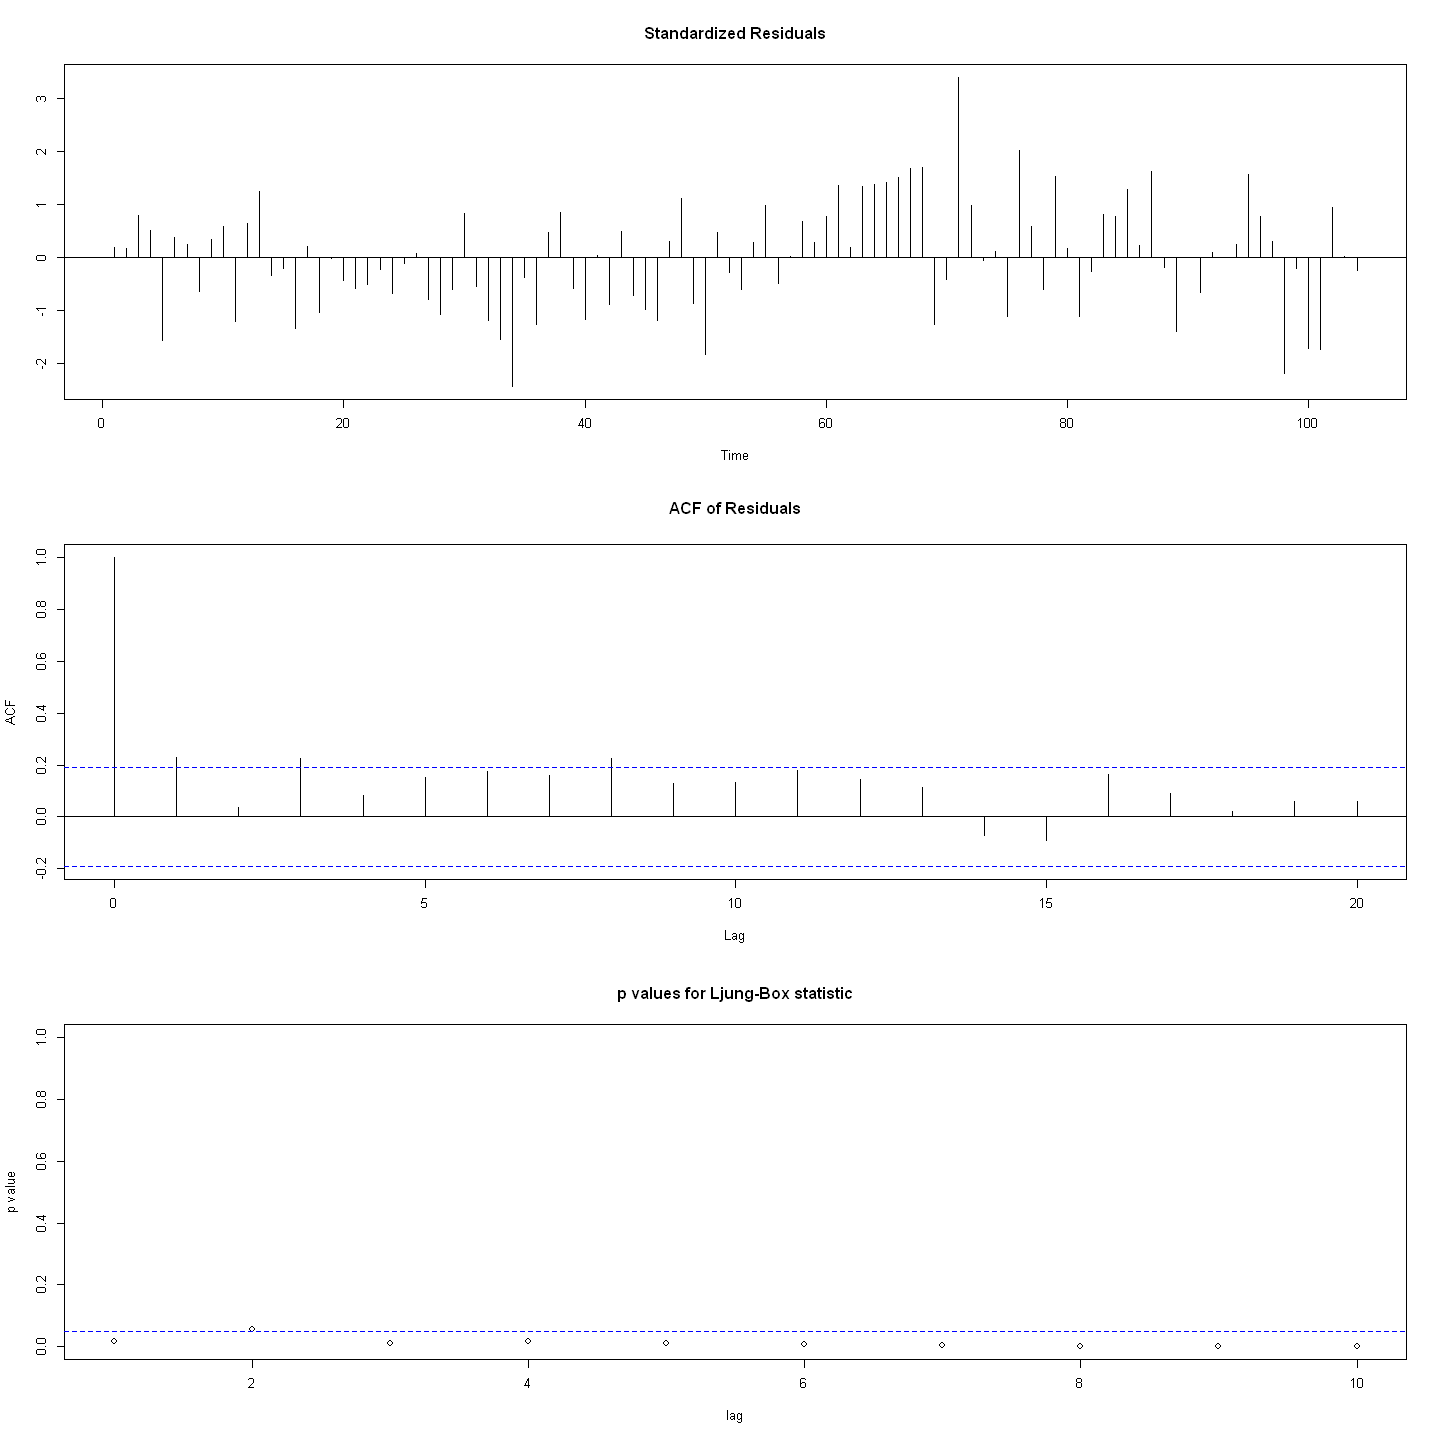

In [55]:
options(repr.plot.width=12, repr.plot.height=12)

tsdiag(model.m3)

In [56]:
ljung.box.test <- function(r, n, k_ar=0, k_ma=0) {
    nlags = length(r)
    denominators = (n-1):(n-nlags)
    Qstar = n * (n-2) * sum(r**2 / denominators)
    df = nlags - k_ar - k_ma
    p_value = 1 - pchisq(Qstar, df=df)
    
    list('X-squared'=Qstar, df=df, 'p-value'=p_value)
}

In [57]:
ljung.box.test(acf(model.m3$resid, lag.max=8, plot=F)$acf[-1], n=nrow(data), k_ar=0, k_ma=2)

$`X-squared`
[1] 25.83392

$df
[1] 6

$`p-value`
[1] 0.0002390727

Some of the residual ACFs are still significant, but the Ljung-Box statistic rejects no autocorrelation -- residuals are still correlated.

In [58]:
model.m4 = arima(data[['log.sales']], order=c(0, 0, 8), xreg=data[['price']])
print(model.m4)
coeftest(model.m4)


Call:
arima(x = data[["log.sales"]], order = c(0, 0, 8), xreg = data[["price"]])

Coefficients:
         ma1     ma2     ma3     ma4     ma5      ma6     ma7     ma8
      0.3440  0.4294  0.1535  0.5352  0.3074  -0.0489  0.2383  0.3621
s.e.  0.1058  0.1194  0.1251  0.1161  0.1316   0.1023  0.0941  0.1189
      intercept  data[["price"]]
        13.3259          -1.8336
s.e.     0.1441           0.0791

sigma^2 estimated as 0.01926:  log likelihood = 54.41,  aic = -86.82



z test of coefficients:

                 Estimate Std. Error  z value  Pr(>|z|)    
ma1              0.344024   0.105758   3.2530 0.0011421 ** 
ma2              0.429400   0.119411   3.5960 0.0003232 ***
ma3              0.153521   0.125122   1.2270 0.2198338    
ma4              0.535183   0.116098   4.6098 4.031e-06 ***
ma5              0.307410   0.131630   2.3354 0.0195222 *  
ma6             -0.048851   0.102310  -0.4775 0.6330203    
ma7              0.238332   0.094123   2.5321 0.0113367 *  
ma8              0.362090   0.118893   3.0455 0.0023229 ** 
intercept       13.325941   0.144145  92.4482 < 2.2e-16 ***
data[["price"]] -1.833554   0.079094 -23.1819 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [59]:
model.m5 = arima(data[['log.sales']], order=c(0, 0, 8), xreg=data[['price']], fixed=c(NA, NA, 0, NA, NA, 0, NA, NA, NA, NA))
print(model.m5)
coeftest(model.m5)


Call:
arima(x = data[["log.sales"]], order = c(0, 0, 8), xreg = data[["price"]], fixed = c(NA, 
    NA, 0, NA, NA, 0, NA, NA, NA, NA))

Coefficients:
         ma1     ma2  ma3     ma4     ma5  ma6     ma7     ma8  intercept
      0.3384  0.4423    0  0.5496  0.2779    0  0.2136  0.3871    13.3671
s.e.  0.1141  0.1467    0  0.1335  0.1364    0  0.1032  0.1117     0.1794
      data[["price"]]
              -1.8579
s.e.           0.1006

sigma^2 estimated as 0.01846:  log likelihood = 53.43,  aic = -88.86



z test of coefficients:

                Estimate Std. Error  z value  Pr(>|z|)    
ma1              0.33845    0.11413   2.9655 0.0030224 ** 
ma2              0.44227    0.14670   3.0149 0.0025710 ** 
ma4              0.54959    0.13355   4.1154 3.866e-05 ***
ma5              0.27790    0.13638   2.0378 0.0415735 *  
ma7              0.21356    0.10317   2.0700 0.0384548 *  
ma8              0.38711    0.11172   3.4649 0.0005305 ***
intercept       13.36706    0.17944  74.4915 < 2.2e-16 ***
data[["price"]] -1.85794    0.10056 -18.4761 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


$`X-squared`
[1] 3.818466

$df
[1] 2

$`p-value`
[1] 0.148194

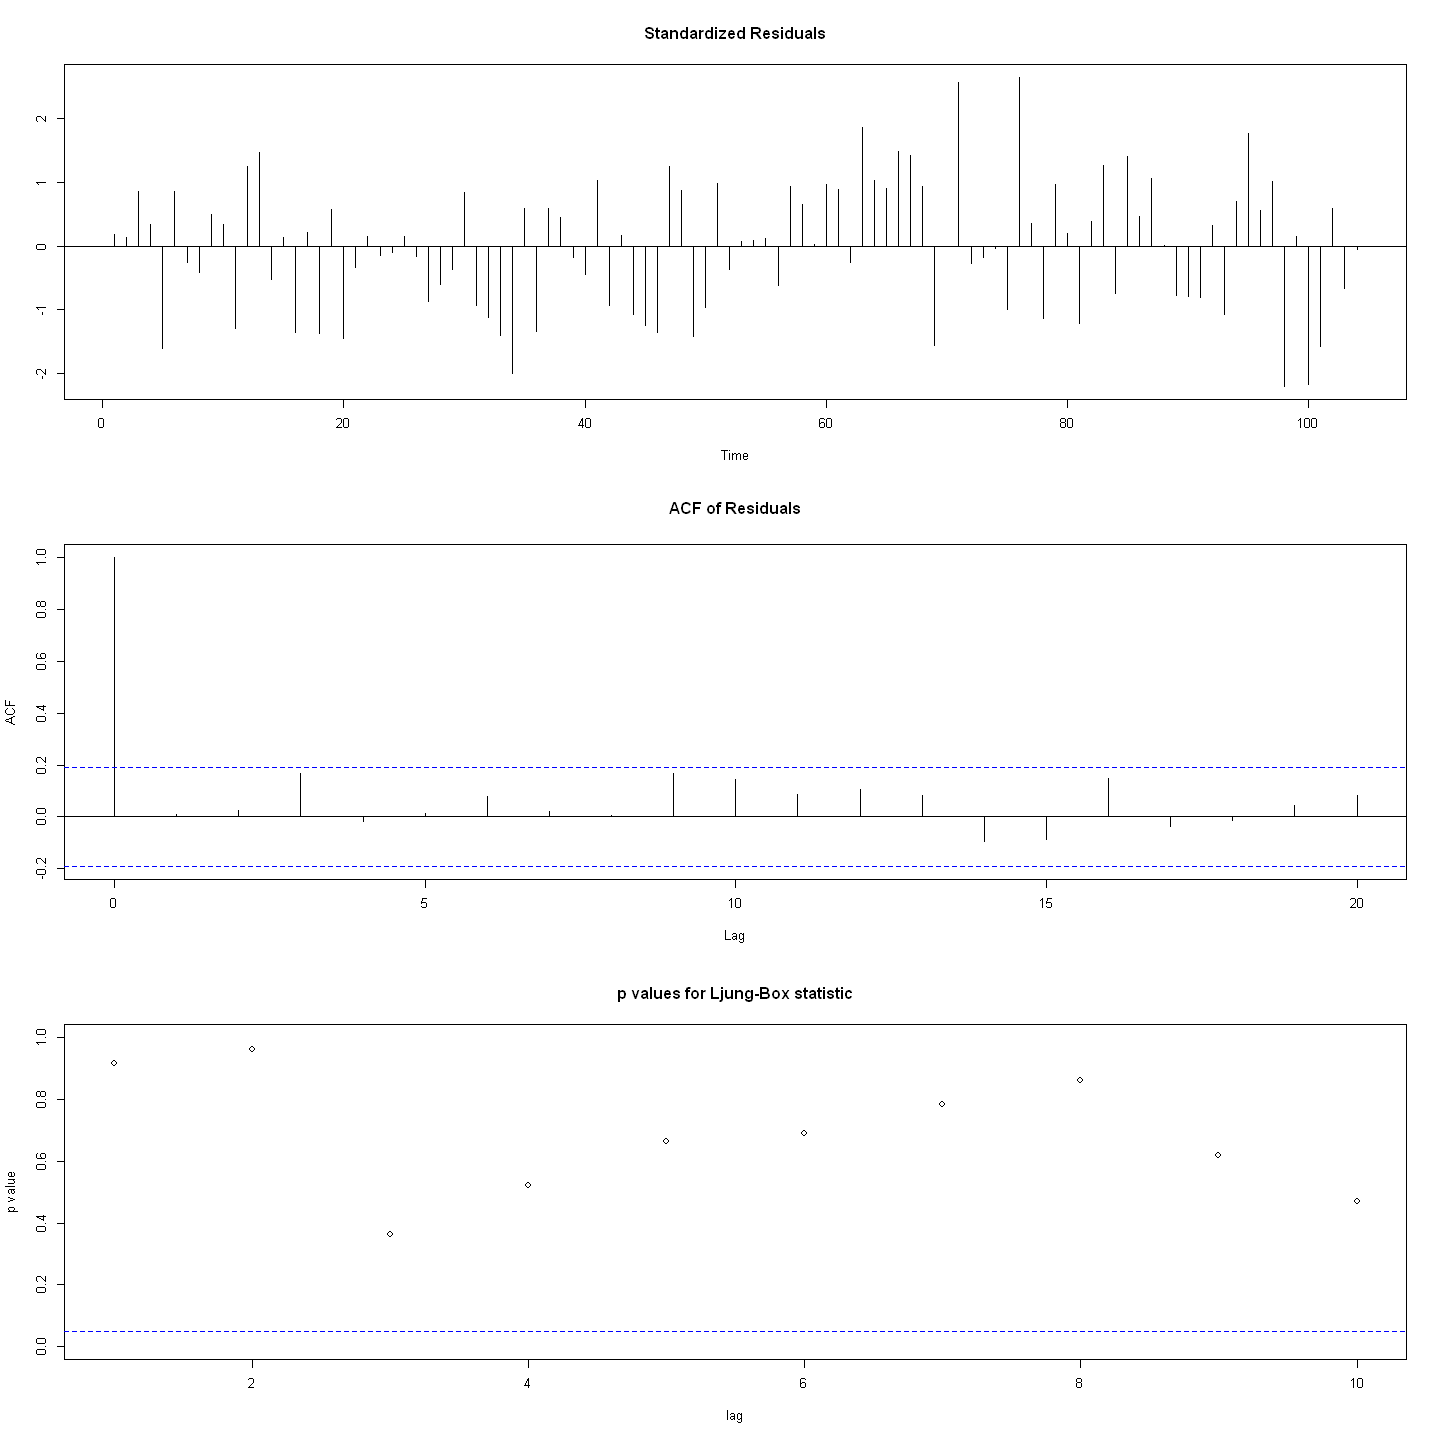

In [60]:
options(repr.plot.width=12, repr.plot.height=12)
tsdiag(model.m5)
ljung.box.test(acf(model.m5$resid, lag.max=8, plot=F)$acf[-1], n=nrow(data), k_ar=0, k_ma=6)

Instead, fitting a MA(8) model with $\theta_3$ and $\theta_6$ fixed to zero appears to display no autocorrelation on the residuals.

**Exercise 11.20**.  The file named `units` contains annual unit sales of a certain product from a widely known international company over the years 1983 through 2005. (The name of the company must remain anonymous for proprietary reasons.)

**(a)** Plot the time series of units and describe the general features of the plot.

**(b)** Use ordinary least squares regression to fit a straight line in time to the series.

**(c)** Display the sample PACF of the residuals from this model, and specify an ARIMA model for the residuals.

**(d)** Now fit the model unit sales = AR(2) + time.  Interpret the output.  In particular, compare the estimated regression coefficient on the time variable obtained here with the one you obtained in part (b).

**(e)** Perform a thorough analysis of the residuals from this last model.

**(f)** Repeat parts (d) and (e) using the logarithms of unit sales as the response variable.  Compare these results with those obtained in parts (d) and (e).

**Solution**.

In [61]:
data <- fread('../data/units.dat')
data[, 't' := 1:nrow(data) + 1982]

**(a)**

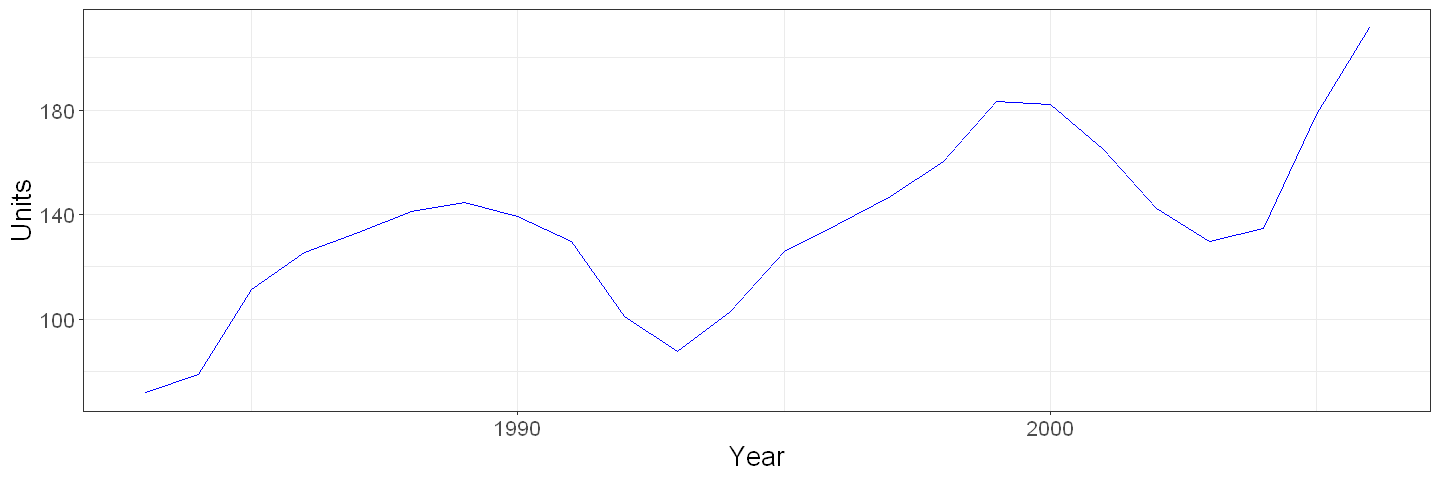

In [62]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot(data) + 
  geom_line(aes(x = t, y = units), color="blue") + 
  xlab('Year') + ylab('Units') +
  theme_bw() + theme(text = element_text(size=16))

The series appears to be very smooth, with a very long seasonality (only two cycles?) and an overall growing trend.

**(b)**

In [63]:
model = lm(units ~ t, data=data)
summary(model)


Call:
lm(formula = units ~ t, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.184 -23.096   6.212  19.289  37.258 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6535.4915  1467.4541  -4.454 0.000199 ***
t               3.3449     0.7357   4.546 0.000159 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24.95 on 22 degrees of freedom
Multiple R-squared:  0.4844,	Adjusted R-squared:  0.461 
F-statistic: 20.67 on 1 and 22 DF,  p-value: 0.0001589


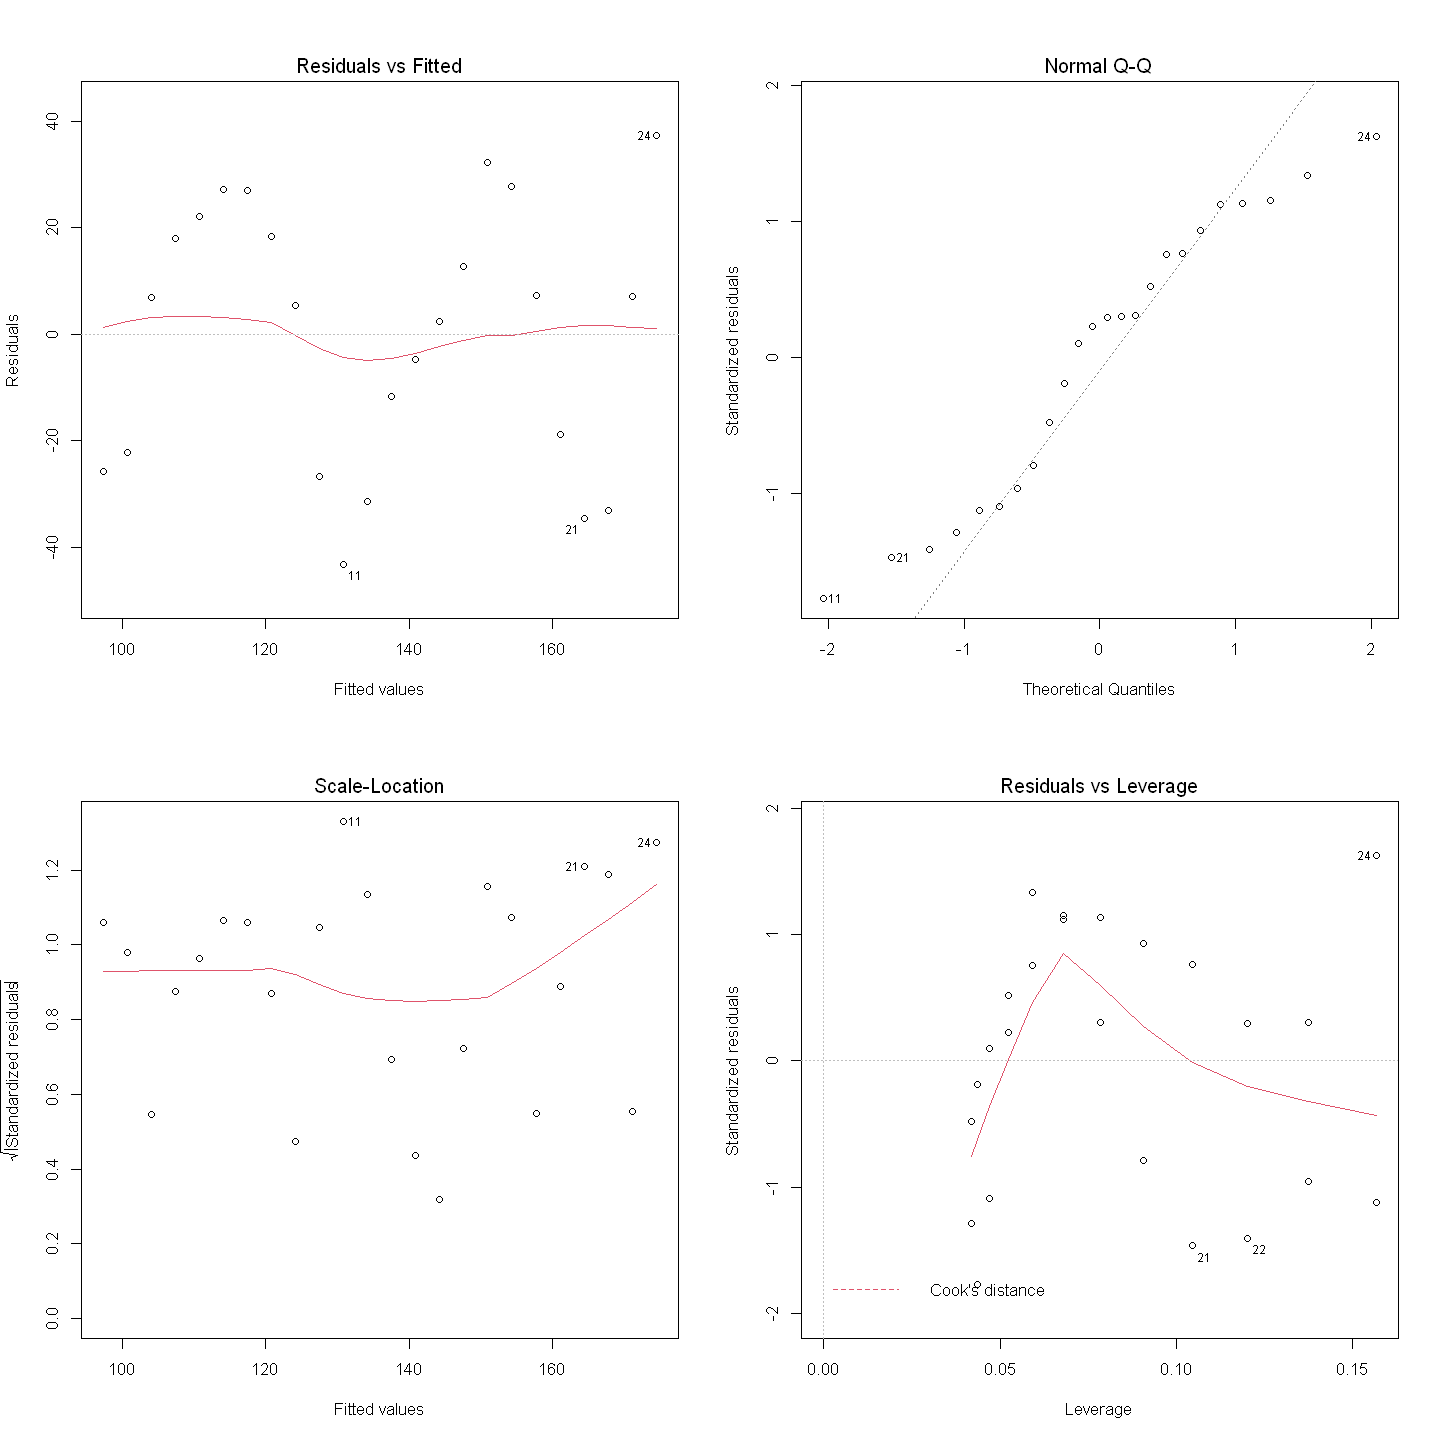

In [64]:
par(mfrow=c(2,2))
options(repr.plot.width=12, repr.plot.height=12)
plot(model)

**(c)**

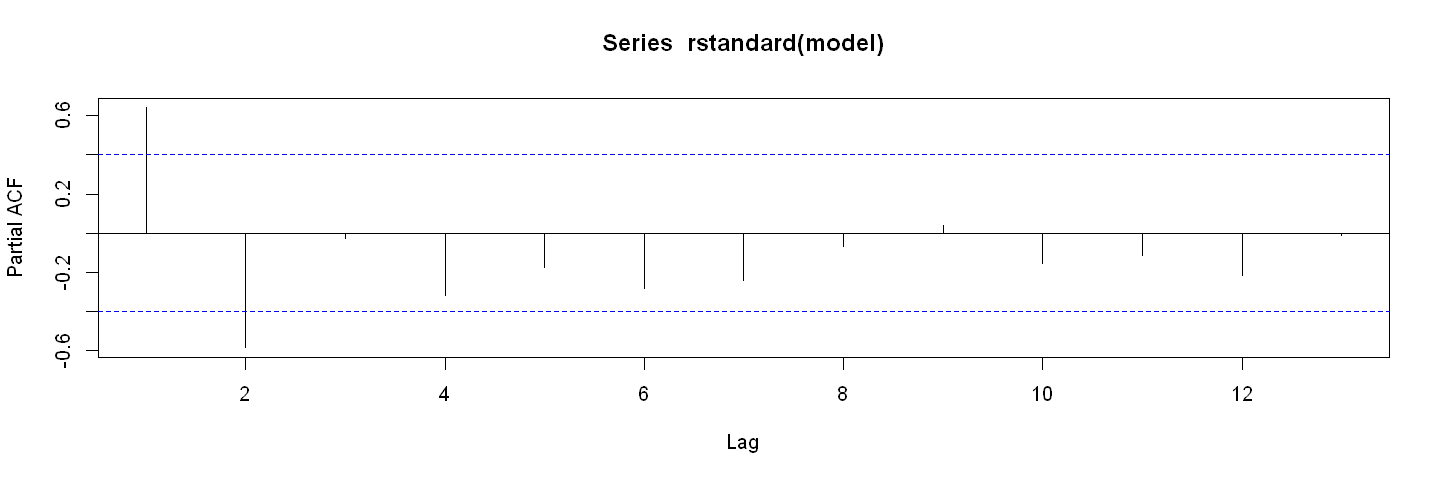

In [65]:
par(mfrow=c(1, 1))
options(repr.plot.width=12, repr.plot.height=4)
pacf(rstandard(model))

PACF suggests an AR(2) model.

**(d)**

In [66]:
model = arima(data[['units']], order=c(2, 0, 0), xreg=data[['t']])
print(model)
coeftest(model)


Call:
arima(x = data[["units"]], order = c(2, 0, 0), xreg = data[["t"]])

Coefficients:
         ar1      ar2  intercept  data[["t"]]
      1.3310  -0.8289  -6675.821       3.4161
s.e.  0.1154   0.1077   1318.774       0.6612

sigma^2 estimated as 94.08:  log likelihood = -90.12,  aic = 190.25



z test of coefficients:

               Estimate  Std. Error z value  Pr(>|z|)    
ar1             1.33103     0.11543 11.5313 < 2.2e-16 ***
ar2            -0.82889     0.10768 -7.6979 1.383e-14 ***
intercept   -6675.82055  1318.77347 -5.0621 4.146e-07 ***
data[["t"]]     3.41608     0.66124  5.1661 2.390e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


The regression coefficient time is extremely close between both regressions.

**(e)**

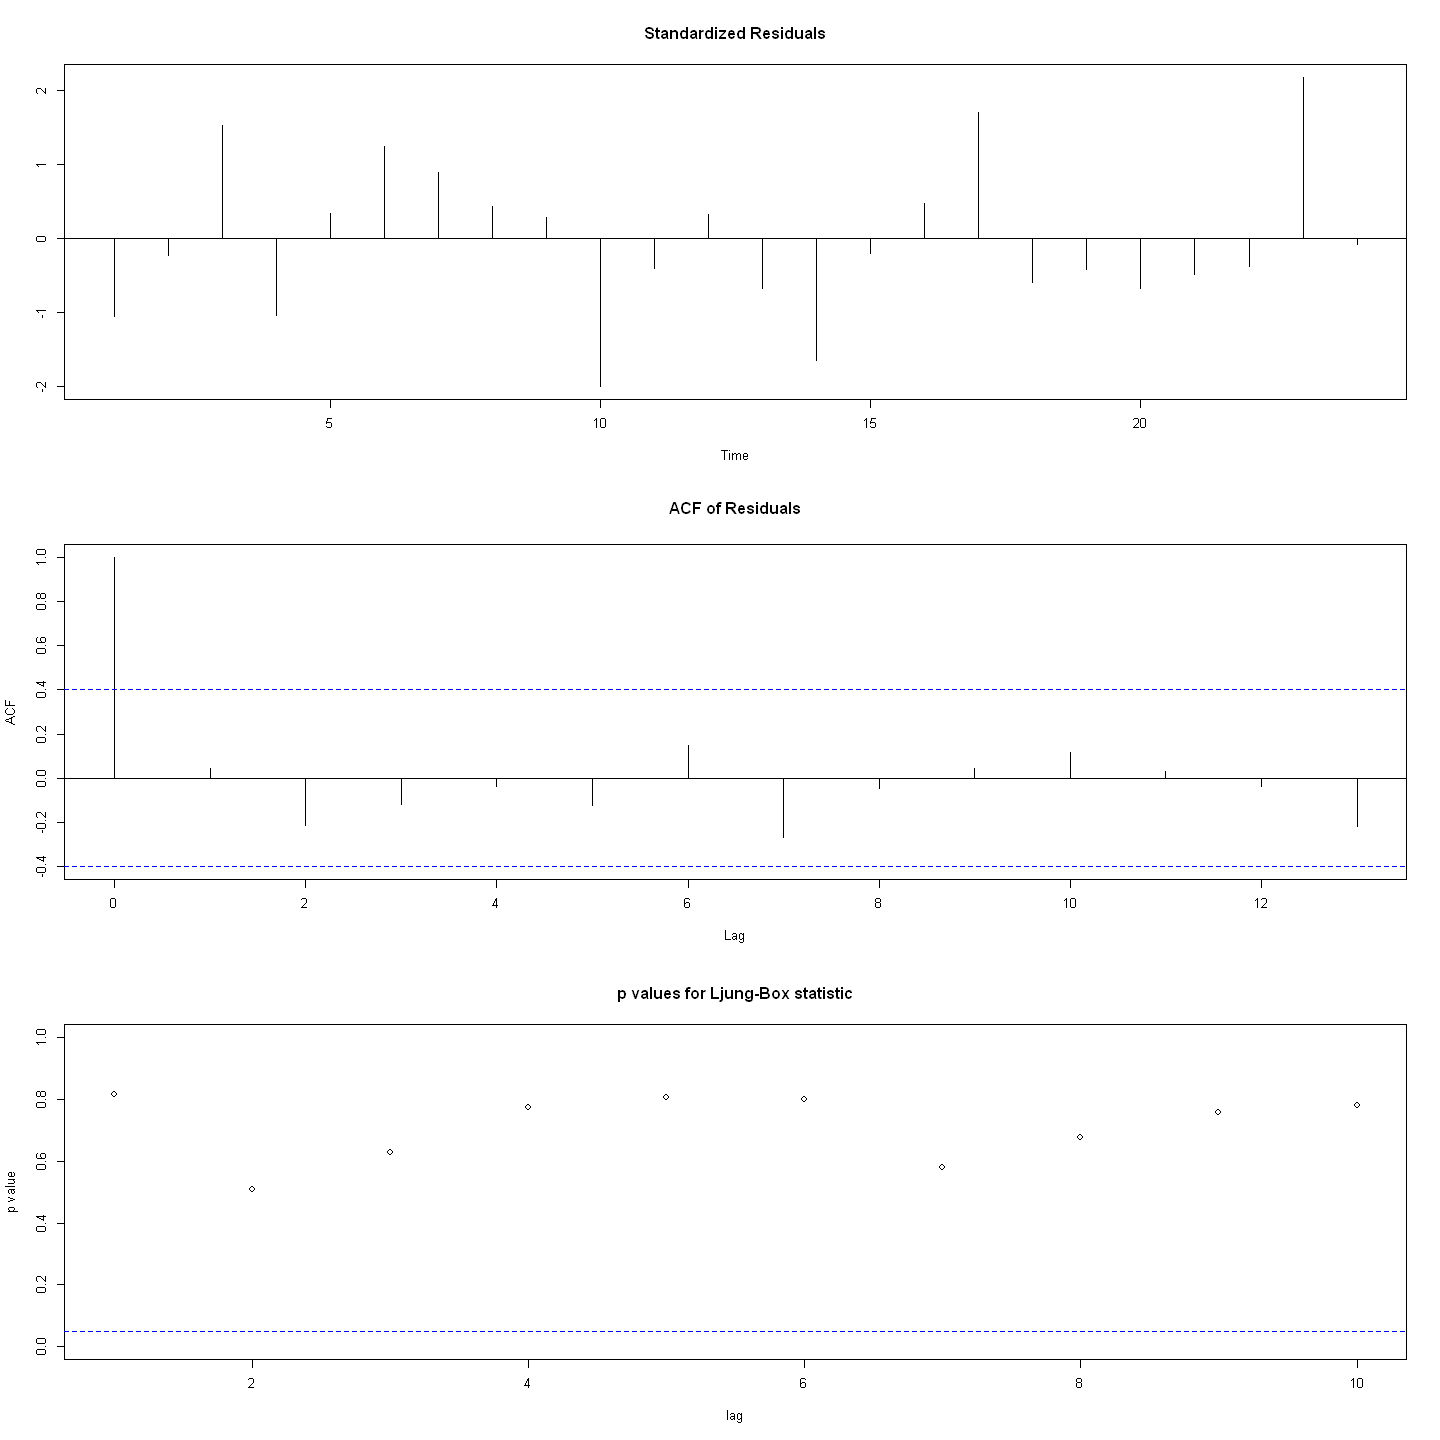

In [67]:
options(repr.plot.width=12, repr.plot.height=12)
tsdiag(model)

In [68]:
ljung.box.test(acf(model$resid, lag.max=8, plot=F)$acf[-1], n=nrow(data), k_ar=2, k_ma=0)

$`X-squared`
[1] 4.864829

$df
[1] 6

$`p-value`
[1] 0.5612632

In [69]:
shapiro.test(model$resid)


	Shapiro-Wilk normality test

data:  model$resid
W = 0.9744, p-value = 0.7749


The model seems fine.

**(f)**

In [70]:
model = arima(log(data[['units']]), order=c(2, 0, 0), xreg=data[['t']])
print(model)
coeftest(model)


Call:
arima(x = log(data[["units"]]), order = c(2, 0, 0), xreg = data[["t"]])

Coefficients:
         ar1      ar2  intercept  data[["t"]]
      1.2869  -0.7750   -46.6062       0.0258
s.e.  0.1333   0.1359    11.5608       0.0058

sigma^2 estimated as 0.007025:  log likelihood = 24.15,  aic = -38.31



z test of coefficients:

               Estimate  Std. Error z value  Pr(>|z|)    
ar1           1.2869203   0.1332783  9.6559 < 2.2e-16 ***
ar2          -0.7749501   0.1359192 -5.7015 1.187e-08 ***
intercept   -46.6061813  11.5608499 -4.0314 5.545e-05 ***
data[["t"]]   0.0258184   0.0057814  4.4658 7.978e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


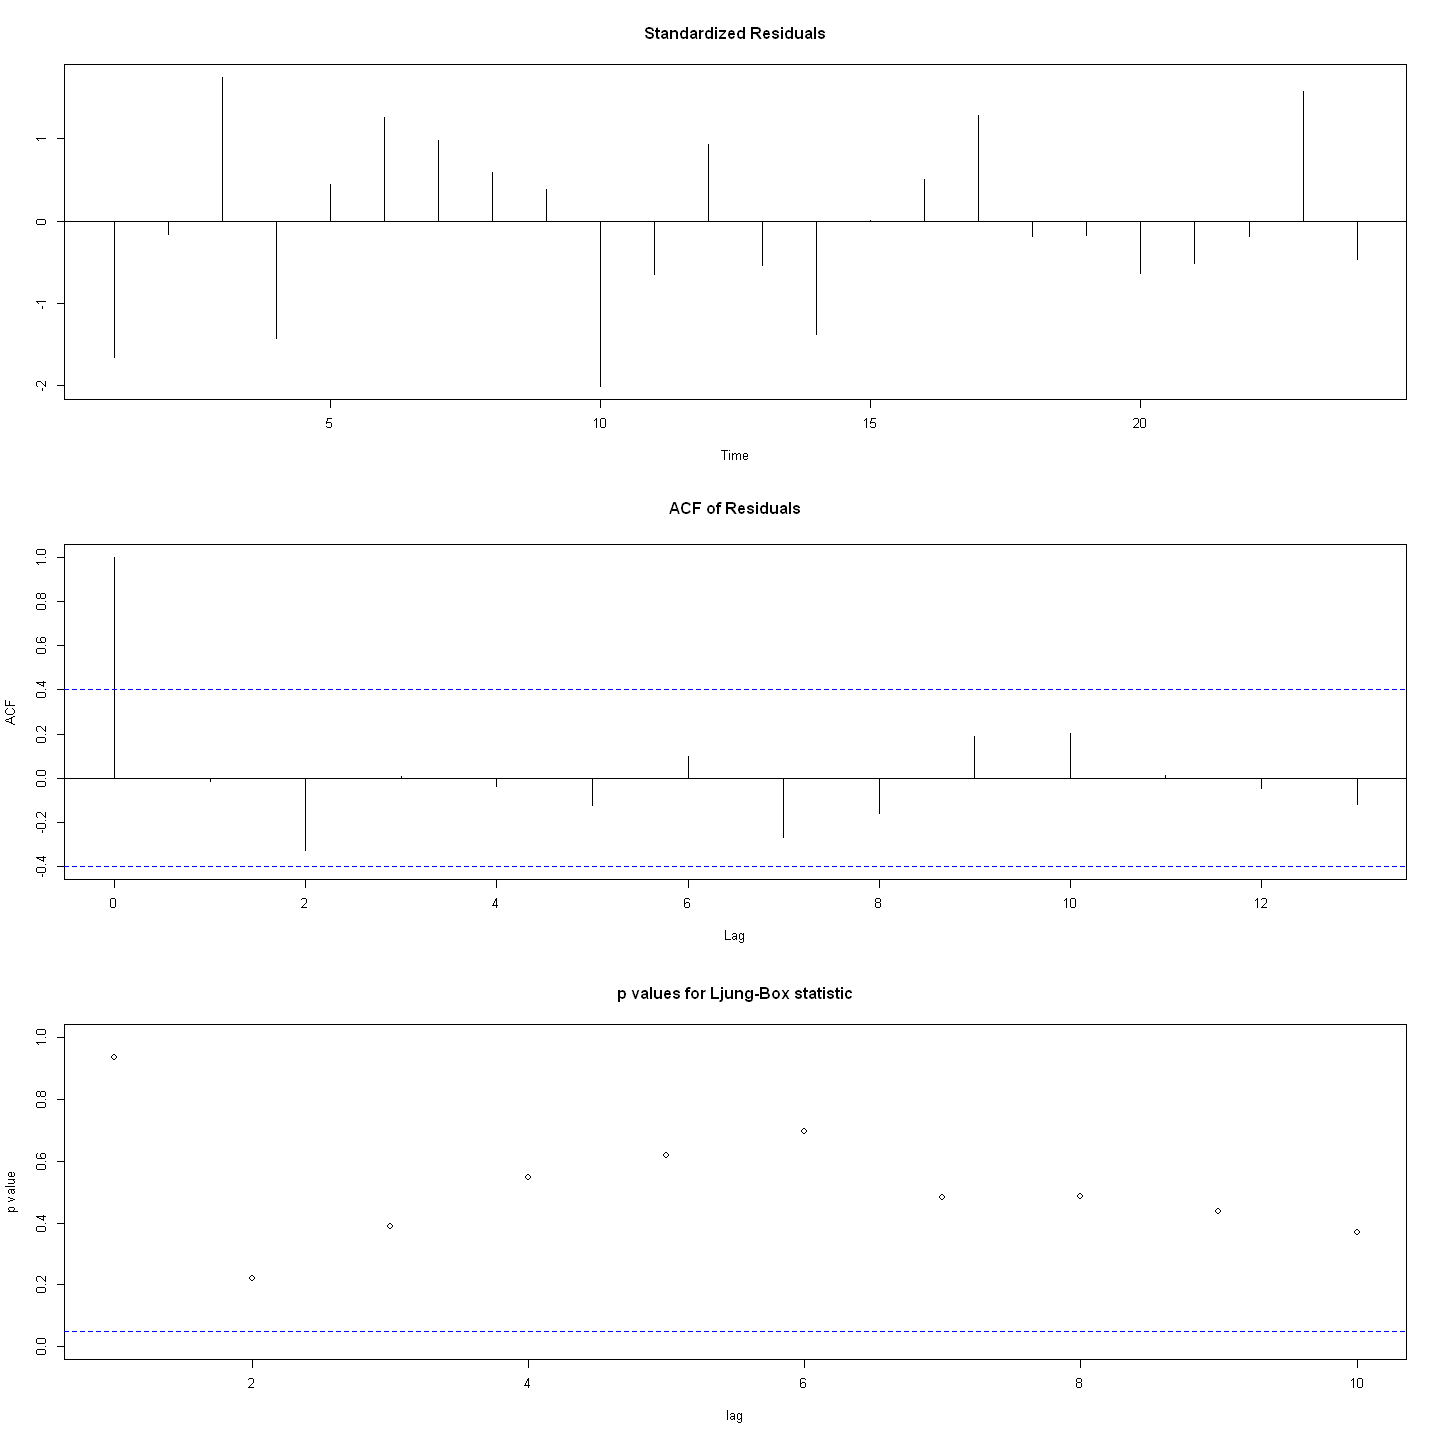

In [71]:
options(repr.plot.width=12, repr.plot.height=12)
tsdiag(model)

In [72]:
ljung.box.test(acf(model$resid, lag.max=8, plot=F)$acf[-1], n=nrow(data), k_ar=2, k_ma=0)

$`X-squared`
[1] 6.32192

$df
[1] 6

$`p-value`
[1] 0.388111

In [73]:
shapiro.test(model$resid)


	Shapiro-Wilk normality test

data:  model$resid
W = 0.9722, p-value = 0.7213


This model also appears to be a good fit.